In [1]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import scale
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score, recall_score, precision_score, confusion_matrix
from sklearn.metrics import r2_score, roc_auc_score, roc_curve, classification_report
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score
from scipy.stats import sem
import pingouin as pg
from scipy import stats
import scikit_posthocs as sp
import tensorflow as tf 
from tensorflow import keras
import easygui
import seaborn as sns
from sklearn.model_selection import cross_validate
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import KFold
import matplotlib.ticker as ticker
OUTDATED_IGNORE=1
notnorm = True
import itertools
import scipy.io

C:\Users\gniew\AppData\Roaming\Python\Python37\site-packages\outdated\utils.py:18: OutdatedCheckFailedWarning: Failed to check for latest version of package.
Set the environment variable OUTDATED_RAISE_EXCEPTION=1 for a full traceback.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs


In [2]:
pathway = "G:/NI_VTA/IN_VIVO/Short_stim/Python_electro.xlsx"

In [3]:
df = pd.read_excel(pathway)

In [4]:
df_inhi = df.iloc[:, 14:19]
df_inhi

,start_inhi,end_inhi,latency_inhi,duration_inhi,average_inhi
0,0.000,0.000,0.000,0.000,0.000000
1,0.000,0.083,0.000,0.083,2.645980
2,0.000,0.000,0.000,0.000,0.000000
3,0.000,0.000,0.000,0.000,0.000000
4,0.000,0.000,0.000,0.000,0.000000
...,...,...,...,...,...
56,0.000,0.000,0.000,0.000,0.000000
57,0.000,0.000,0.000,0.000,0.000000
58,0.000,0.165,0.000,0.165,0.363966
59,0.005,0.184,0.005,0.179,0.240362


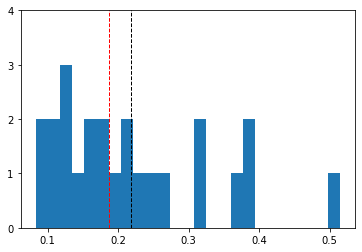

In [5]:
tick_spacing = 1
fig, ax = plt.subplots()
ax.hist(df_inhi.loc[df_inhi["duration_inhi"] > 0, "duration_inhi"], bins=25)
plt.yticks(np.arange(0, 5, 1.0))
ax.axvline(df_inhi.loc[df_inhi["duration_inhi"] > 0, "duration_inhi"].mean(), color='k', linestyle='dashed', linewidth=1)
ax.axvline(df_inhi.loc[df_inhi["duration_inhi"] > 0, "duration_inhi"].median(), color='r', linestyle='dashed', linewidth=1)
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_hist_duration.svg"
plt.savefig(save_fig_to)

In [6]:
df_inhi.loc[df_inhi["duration_inhi"] > 0, "duration_inhi"].mean()
df_inhi.loc[df_inhi["duration_inhi"] > 0, "duration_inhi"].median()

0.1875

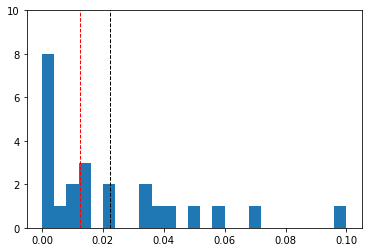

In [7]:

plt.hist(df_inhi.loc[df_inhi["duration_inhi"] > 0, "latency_inhi"], bins=25)
plt.axvline(df_inhi.loc[df_inhi["duration_inhi"] > 0, "latency_inhi"].mean(), color='k', linestyle='dashed', linewidth=1)
plt.axvline(df_inhi.loc[df_inhi["duration_inhi"] > 0, "latency_inhi"].median(), color='r', linestyle='dashed', linewidth=1)
plt.ylim((0,10))
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_hist_latency.svg"
plt.savefig(save_fig_to)

In [8]:
round(df_inhi.loc[df_inhi["duration_inhi"] > 0,"duration_inhi"].mean(),3)

0.219

In [9]:
round(df_inhi.loc[df_inhi["duration_inhi"] > 0,"duration_inhi"].median(),3)

0.188

In [10]:
round(df_inhi.loc[df_inhi["duration_inhi"] > 0,"duration_inhi"].sem(),3)

0.023

In [11]:
round(df_inhi.loc[df_inhi["duration_inhi"] > 0,"latency_inhi"].mean(),3)

0.022

In [12]:
round(df_inhi.loc[df_inhi["duration_inhi"] > 0,"latency_inhi"].median(),3)

0.013

In [13]:
round(df_inhi.loc[df_inhi["duration_inhi"] > 0,"latency_inhi"].sem(),3)

0.005

In [14]:
inhi_n = df["average_inhi"] > 0
no_inhi, inhi_n = inhi_n.value_counts()
responose = [no_inhi, inhi_n]
explode = (0, 0.03)
print(f"Inhi n: {inhi_n}, No-Inhi n: {no_inhi}")


Inhi n: 24, No-Inhi n: 37


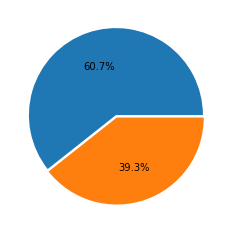

In [15]:
fig, ax = plt.subplots()
ax.pie(responose, autopct='%1.1f%%', explode = explode)
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_pie_inhi.svg"
plt.savefig(save_fig_to)

In [16]:
rebund_n = len(df.loc[(df["average_rebo"] > 0) & (df["average_inhi"] > 0), "average_rebo"])
no_rebund_n = len(df.loc[(df["average_rebo"] == 0) & (df["average_inhi"] > 0), "average_rebo"])
response = [no_rebund_n, rebund_n]
print(f"Rebound_n: {rebund_n}, No-Rebound_n: {no_rebund_n}")

Rebound_n: 4, No-Rebound_n: 20


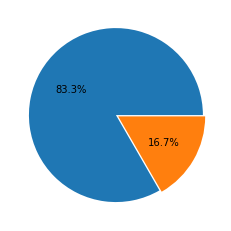

In [17]:
fig, ax = plt.subplots()
ax.pie(response, autopct='%1.1f%%', explode = explode)
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_pie_rebound.svg"
plt.savefig(save_fig_to)

In [18]:
base_inhi = df.loc[df["average_inhi"] > 0, "average"].tolist()

In [19]:
response_inhi = df.loc[df["average_inhi"] > 0, "average_inhi"].tolist()
list_inhi = [response_inhi, base_inhi]

In [20]:
ans1 = [print(pg.normality(i)) for i in list_inhi]


          W      pval  normal
0  0.885879  0.010936   False
          W      pval  normal
0  0.942354  0.184035    True


In [21]:
pg.wilcoxon(list_inhi[0],list_inhi[1])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,1.192093e-07,-1.0,0.303819


In [22]:
inhibi_str = ["inhi" for i in range(len(response_inhi ))]
base_str = ["base" for i in range(len(response_inhi ))]
str_col = base_str + inhibi_str
len(str_col)

48

In [23]:
activity_col =  list_inhi[1] + list_inhi[0]
assert len(activity_col) == len(str_col)

In [24]:
df_normlaized = pd.DataFrame(list(zip(activity_col, str_col)), columns = ["norm_activity", "type"])

In [25]:
normalizer = MinMaxScaler()
#df_normlaized["norm_activity"] = normalizer.fit_transform(df_normlaized["norm_activity"].to_numpy().reshape(-1, 1))
df_normlaized

,norm_activity,type
0,3.504203,base
1,1.926009,base
2,3.283362,base
3,3.667687,base
4,3.928661,base
5,5.824563,base
6,3.099467,base
7,3.945267,base
8,4.530786,base
9,2.174767,base


In [26]:
pg.wilcoxon(df_normlaized.loc[df_normlaized["type"] == "inhi", "norm_activity"],df_normlaized.loc[df_normlaized["type"] == "base", "norm_activity"])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,1.192093e-07,-1.0,0.303819


In [27]:
pg.normality(df_normlaized.loc[df_normlaized["type"] == "inhi", "norm_activity"])

,W,pval,normal
norm_activity,0.885879,0.010936,False


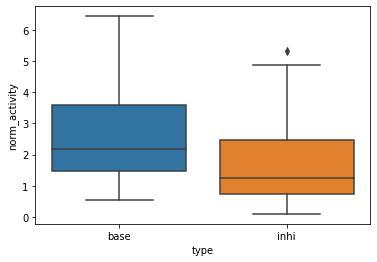

In [28]:
sns.boxplot(data=df_normlaized, x="type", y="norm_activity")
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_boxplot_responose.svg"
plt.savefig(save_fig_to)

In [29]:
# PUT NO RESPONOSE STIM (ONLY FROM ELECTRO SHORT)
list_of_files = easygui.fileopenbox(title="Select a file", filetypes= "*.csv",  multiple=True)

In [30]:
stim_no_respons = []
gen_df = (pd.read_csv(i, sep='\t') for i in list_of_files)
for i in gen_df:
    stim_no_respons.append(i[2022:2243].mean()[1])
len(stim_no_respons)

37

In [32]:
pathway_v3 = "G:/NI_VTA/IN_VIVO/Short_stim/Python_electro_modeling.xlsx"

In [33]:
df_modeling_new = pd.read_excel(pathway_v3)

In [34]:
base_no_respons = df_modeling_new.loc[df_modeling_new["average_inhi"] == 0, "average"].tolist()
len(base_no_respons)

43

In [35]:
inhibtion_string = ["inhibtion" for i in range(len(df_normlaized))]
df_normlaized["group"] = inhibtion_string
#assert len(stim_no_respons) == len(base_no_respons)
df_normlaized

,norm_activity,type,group
0,3.504203,base,inhibtion
1,1.926009,base,inhibtion
2,3.283362,base,inhibtion
3,3.667687,base,inhibtion
4,3.928661,base,inhibtion
5,5.824563,base,inhibtion
6,3.099467,base,inhibtion
7,3.945267,base,inhibtion
8,4.530786,base,inhibtion
9,2.174767,base,inhibtion


In [36]:
base_no_respons = df.loc[df["average_inhi"] == 0, "average"].tolist()
type_stim = ["inhi" for i in range(len(stim_no_respons))]
type_base = ["base" for i in range(len(base_no_respons))]
activity_no_respons = base_no_respons + stim_no_respons
type_no_respons = type_base + type_stim
group_no_respons = ["non_responding" for i in range(len(type_no_respons))]
assert len(activity_no_respons) == len(type_no_respons) == len(group_no_respons)


In [37]:
#dict_to_append = {"norm_activity": activity_no_respons, "type": type_no_respons, "group": group_no_respons}
#df_normlaized = df_normlaized.append(dict_to_append, ignore_index=True)
df_2 = pd.DataFrame(list(zip(activity_no_respons, type_no_respons, group_no_respons)), columns = ["norm_activity", "type", "group"])
#df_2["norm_activity"] = normalizer.fit_transform(df_2["norm_activity"].to_numpy().reshape(-1, 1))
pieces = {"x": df_normlaized, "y": df_2}
result = pd.concat(pieces)
result.reset_index(inplace = True)
result.drop(["level_0" ,"level_1"], axis=1, inplace=True)
result


,norm_activity,type,group
0,3.504203,base,inhibtion
1,1.926009,base,inhibtion
2,3.283362,base,inhibtion
3,3.667687,base,inhibtion
4,3.928661,base,inhibtion
...,...,...,...
117,2.692605,inhi,non_responding
118,2.208335,inhi,non_responding
119,4.939906,inhi,non_responding
120,1.640114,inhi,non_responding


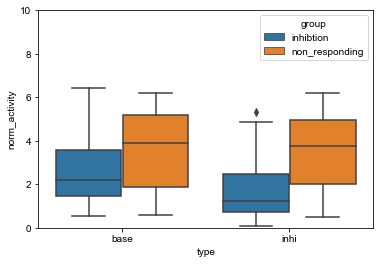

In [38]:
sns.boxplot(data=result, x="type", y="norm_activity", hue = "group")
sns.set_theme(context='notebook')
plt.ylim(0, 10.)
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_boxplot_responose_all.svg"
plt.savefig(save_fig_to)

In [39]:
float_convert = result["norm_activity"].tolist()
#loatfloat()
#result["norm_activity"] = float_convert
Data_type = float
#ans_4 = np.array(float_convert, dtype=Data_type)

result["norm_activity"].dtype

dtype('float64')

In [40]:
#pg.normality(result.loc[(result["type"] == "base") & (result["group"] == "inhibtion"), "norm_activity"])
pg.normality(result.loc[(result["type"] == "base") & (result["group"] == "non_responding"), "norm_activity"])
#pg.normality(result.loc[(result["type"] == "inhi") & (result["group"] == "non_responding"), "norm_activity"])

,W,pval,normal
norm_activity,0.931262,0.024512,False


In [41]:
# base inhi vs base non_responding  -> sprawdzone w STATISTICE 
pg.mwu(result.loc[(result["type"] == "base") & (result["group"] == "inhibtion"), "norm_activity"], result.loc[(result["type"] == "base") & (result["group"] == "non_responding"), "norm_activity"])

,U-val,alternative,p-val,RBC,CLES
MWU,298.0,two-sided,0.031705,0.328829,0.335586


In [42]:
# base inhi vs stim inhi -> sprawdzone w STATISTICE  
pg.wilcoxon(result.loc[(result["type"] == "base") & (result["group"] == "inhibtion"), "norm_activity"], result.loc[(result["type"] == "inhi") & (result["group"] == "inhibtion"), "norm_activity"])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,0.0,two-sided,1.192093e-07,1.0,0.696181


In [43]:
# base non_responding vs stim non_responding > sprawdzone w STATISTICE  
pg.wilcoxon(result.loc[(result["type"] == "base") & (result["group"] == "non_responding"), "norm_activity"], result.loc[(result["type"] == "inhi") & (result["group"] == "non_responding"), "norm_activity"])
#result.loc[(result["type"] == "inhi") & (result["group"] == "non_responding"), "norm_activity"].tolist()

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,222.0,two-sided,0.051639,0.368421,0.517166


In [44]:
# all neurons base vs stim activity
pg.wilcoxon(result.loc[(result["type"] == "base"), "norm_activity"], result.loc[(result["type"] == "inhi") , "norm_activity"])

,W-val,alternative,p-val,RBC,CLES
Wilcoxon,232.0,two-sided,3.034058e-07,0.754627,0.572427


In [45]:
result.loc[(result["type"] == "inhi") , "norm_activity"].mean()

2.798200272822554

In [46]:
# all neurons base vs stim activity
pg.wilcoxon(base_activity, stim_activity)

NameError: name 'base_activity' is not defined

In [47]:
pathway_v2 = "G:/NI_VTA/IN_VIVO/Short_stim/Python_koordynaty.xlsx"

In [48]:
df_v3 = pd.read_excel(pathway_v2)
df_v3.head()

,AP,ML,DV,label
0,-5.20,-0.771,-8.374,0
1,-5.20,-0.771,-8.554,1
2,-5.20,-0.772,-8.739,0
3,-5.04,-1.016,-8.644,0
4,-5.04,-1.016,-8.794,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


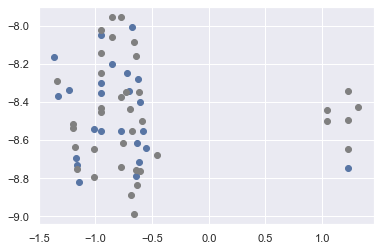

In [49]:
fig, ax = plt.subplots()

ax.scatter(df_v3.loc[df_v3["label"] == 1, "ML"].tolist(),df_v3.loc[df_v3["label"] == 1, "DV"].tolist(), c=(0.34509803921568627, 0.4588235294117647, 0.6431372549019608), alpha= 1)
ax.scatter(df_v3.loc[df_v3["label"] == 0, "ML"].tolist(),df_v3.loc[df_v3["label"] == 0, "DV"].tolist(), c=(0.5019607843137255, 0.5019607843137255, 0.5019607843137255),alpha= 1)
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/VTA_reconstruction.svg"
plt.savefig(save_fig_to)
plt.show()

# Modeling

In [50]:
# PUT NO RESPONOSE STIM (ONLY FROM MODELING)
list_of_files = easygui.fileopenbox(title="Select a file", filetypes= "*.csv",  multiple=True)

In [51]:
list_of_files

['G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_A_Cleaned_PStSDF_79_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_C_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_D_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_E_Cleaned_PStSDF_51_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_H_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_I_PStSDF_105_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_18_J_Cleaned_PStSDF_37_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_30_A_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_30_B_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\no_response\\2019_12_

In [52]:
stim_no_respons_sd = []
stim_no_respons = []
stim_no_respons_median = []
base_no_respons_median = []
base_no_respons_mean = []
gen_df = (pd.read_csv(i, sep='\t') for i in list_of_files)
for i in gen_df:
    stim_no_respons.append(i[2022:2243].mean()[1])
    stim_no_respons_sd.append(i[2022:2243].std()[1])
    stim_no_respons_median.append(i[2022:2243].median()[1])
    base_no_respons_median.append(i[0:2000].median()[1])
    base_no_respons_mean.append(i[0:2000].mean()[1])
len(base_no_respons_median)

43

In [53]:
# PUT STIM DATA  (ONLY FROM MODELING)
list_of_files_2 = easygui.fileopenbox(title="Select a file", filetypes= "*.csv",  multiple=True)

In [54]:
# Bbase 
pathway_v3 = "G:/NI_VTA/IN_VIVO/Short_stim/Python_electro_modeling.xlsx"

In [55]:
#Check input
list_of_files_2

['G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_18_B_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_18_G_PStSDF_234_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_18_K_Cleaned_PStSDF_116_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_30_E_Cleaned_PStSDF_193_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_30_F_Cleaned_PStSDF_100_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_30_I_Cleaned_PStSDF_116_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_30_J_Cleaned_PStSDF_179_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2019_12_30_N_Cleaned_PStSDF_105_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2020_02_17_A_PStSDF_141_stym_Akt.txt',
 'G:\\NI_VTA\\IN_VIVO\\Short_stim\\modeling\\Inhibtion\\2020_02_17_B_PStSDF_111_stym_Akt.

In [56]:
stim_inhi = []
stim_inhi_sd = []
stim_inhi_median = []
base_inhi_median = []
base_inhi_mean = []
gen_df = (pd.read_csv(i, sep='\t') for i in list_of_files_2)
for i in gen_df:
    stim_inhi.append(i[2022:2243].mean()[1])
    stim_inhi_sd.append(i[2022:2243].std()[1])
    stim_inhi_median.append(i[2022:2243].median()[1])
    base_inhi_median.append(i[0:2000].median()[1])
    base_inhi_mean.append(i[0:2000].mean()[1])
    print(i[0:2000].mean()[1])

3.5042026700999944
1.9260093268999972
3.2833618227499985
3.667686724900005
3.928661458299999
5.8245627533
3.0994667596500016
3.945266840499995
4.530785700649992
2.1747666813
2.0652831311499975
1.089276896810002
1.5414854334149986
2.95200518375
6.436717108249998
0.5572916947105
3.5427223153000007
2.1504997221500015
0.8784016898499994
0.5404207394050012
2.208190232400001
1.9865795748049973
1.2790077145699998
1.0277467574499988
3.7247541374500006
1.8653423591000036
1.3474645808400012
5.00773750840001
3.884593677650015
0.7603826942150025
1.335725523339999
4.67180843315
0.19613836169119986
3.2550339320499995
1.374954934789998
6.690341660600013
1.6355422829450017


In [57]:
df_modeling_new

,ID,start,end,average,std,krytSTDsAmp,averageDurINHIB,stdDurINHIB,averageDurEXCIT,stdDurEXCIT,...,start_rebo,end_rebo,latency_rebo,duration_rebo,average_rebo,min_rebo,tOFmin_rebo,averageARNDmin_rebo,tOFcntr_rebo,averageARNDcntr_rebo
0,1,-2,-0.001,6.069602,0.591061,1,0.037500,0.012884,0.037875,0.016234,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,-2,-0.001,3.504203,0.392843,1,0.041000,0.025524,0.047875,0.016839,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,-2,-0.001,1.797729,0.434064,1,0.045286,0.023243,0.057000,0.027586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,-2,-0.001,1.797729,0.434064,1,0.045286,0.023243,0.057000,0.027586,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,-2,-0.001,1.512254,0.489236,1,0.045667,0.030936,0.109333,0.142584,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
75,77,-2,-0.001,2.950178,0.500465,1,0.061800,0.035344,0.072750,0.064634,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
76,78,-2,-0.001,1.374955,0.300511,1,0.047571,0.026813,0.090500,0.043913,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
77,79,-2,-0.001,6.690342,0.512895,1,0.068800,0.040357,0.051167,0.019010,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
78,80,-2,-0.001,1.635542,0.371943,1,0.039167,0.034499,0.066750,0.024144,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
base_no_respons =  df_modeling_new.loc[df_modeling_new["average_inhi"] == 0, "average"].tolist()
base_no_respons_std =  df_modeling_new.loc[df_modeling_new["average_inhi"] == 0, "std"].tolist()
#base_no_respons_std
base_no_respons

[6.06960203629999,
 1.7977293262,
 1.7977293262,
 1.512254468375,
 6.18750813985,
 5.33804395695001,
 4.04509594795,
 3.84434001625,
 2.91951587865001,
 3.68249898475,
 2.56910144025,
 5.84235607915,
 4.59067372000001,
 4.4375391923,
 0.60503544967,
 4.59353129385001,
 4.64512365959998,
 0.949242951145,
 0.680589319829999,
 5.31150303095,
 3.91203845294999,
 3.5276861848,
 5.51580135164999,
 2.30830906155,
 1.700182241835,
 5.30054191799999,
 5.5000689877,
 1.89338333172,
 5.19192477304998,
 4.85368172045002,
 4.21278828695001,
 1.408068638965,
 3.1600544548,
 1.355774585095,
 5.0108687605,
 2.2477489265,
 5.3453856373,
 1.858812022795,
 3.88459367765,
 2.3368122894,
 2.3819484415,
 2.95017789525,
 3.6429863153]

In [59]:
base_inhi =  df_modeling_new.loc[df_modeling_new["average_inhi"]> 0, "average"].tolist()
base_inhi_std =  df_modeling_new.loc[df_modeling_new["average_inhi"] > 0, "std"].tolist()
base_inhi


[3.50420267009999,
 1.9260093269,
 3.28336182275,
 3.66768672490001,
 3.9286614583,
 5.8245627533,
 3.09946675965,
 3.9452668405,
 4.53078570064999,
 2.1747666813,
 2.06528313115,
 1.08927689681,
 1.541485433415,
 2.95200518375,
 6.43671710825,
 0.5572916947105,
 3.5427223153,
 2.15049972215,
 0.878401689849999,
 0.540420739405001,
 2.2081902324,
 1.986579574805,
 1.27900771457,
 1.02774675745,
 3.72475413745,
 1.8653423591,
 1.34746458084,
 5.0077375084,
 4.56527128575,
 0.760382694215,
 1.33572552334,
 4.67180843315,
 0.1961383616912,
 3.25503393205,
 1.37495493479,
 6.6903416606,
 1.635542282945]

In [60]:
labels_no_inhi = [0 for i in range(len(base_no_respons))]
labels_inhi = [1 for i in range(len(base_inhi))]
labels = labels_no_inhi + labels_inhi

In [61]:
base_activity = base_no_respons + base_inhi
base_sd_activity = base_no_respons_std + base_inhi_std 
base_median_activity = base_no_respons_median + base_inhi_median
stim_sd_activity = stim_no_respons_sd + stim_inhi_sd
stim_activity = stim_no_respons + stim_inhi
stim_activity_median = stim_no_respons_median + stim_inhi_median

#df_modeling_v2= pd.DataFrame(list(zip(base_activity, stim_activity, base_sd_activity, stim_sd_activity, base_median_activity, stim_activity_median,labels)), columns = ["base_activity", "stim_activity", "base_sd", "stim_sd", "base_median", "stim_median", "labels"])
df_modeling_v2= pd.DataFrame(list(zip(base_activity, stim_activity, base_sd_activity, stim_sd_activity,labels)), columns = ["base_activity", "stim_activity", "base_sd", "stim_sd","labels"])
#df_modeling_v2= pd.DataFrame(list(zip(base_activity, stim_activity)), columns = ["base_activity", "stim_activity", "labels"])
#df_modeling_v2= df_modeling_v2.sample(frac=1).reset_index(drop=True)
df_modeling_v2.head(80)

,base_activity,stim_activity,base_sd,stim_sd,labels
0,6.069602,6.140305,0.591061,0.271819,0
1,1.797729,0.496416,0.434064,0.203905,0
2,1.797729,1.811995,0.434064,0.259474,0
3,1.512254,1.634404,0.489236,0.251202,0
4,6.187508,6.209870,0.534133,0.579101,0
...,...,...,...,...,...
75,0.196138,0.032794,0.118592,0.035891,1
76,3.255034,1.274236,0.405863,0.597690,1
77,1.374955,1.248497,0.300511,0.226114,1
78,6.690342,5.873375,0.512895,0.473532,1


In [62]:
def restart():
    global X, y, notnorm, X_train,  X_test, y_train, y_test, X_train_scaled, X_test_scaled
    X = df_modeling_v2.drop("labels", axis=1).copy()
    y = df_modeling_v2["labels"].copy()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)
    X_train_scaled = scale(X_train)
    X_test_scaled = scale(X_test)
    notnorm = True
    #print(len(X_train_scaled), len(y_train))
restart()
X

,base_activity,stim_activity,base_sd,stim_sd
0,6.069602,6.140305,0.591061,0.271819
1,1.797729,0.496416,0.434064,0.203905
2,1.797729,1.811995,0.434064,0.259474
3,1.512254,1.634404,0.489236,0.251202
4,6.187508,6.209870,0.534133,0.579101
...,...,...,...,...
75,0.196138,0.032794,0.118592,0.035891
76,3.255034,1.274236,0.405863,0.597690
77,1.374955,1.248497,0.300511,0.226114
78,6.690342,5.873375,0.512895,0.473532


In [63]:
def restart_norm():
    global X, y, notnorm, base_activity, stim_activity, labels, df_modeling_v2, base_median_activity, stim_activity_median
    if notnorm:
        #df_modeling_v2= pd.DataFrame(list(zip(base_activity, stim_activity, labels)), columns = ["base_activity", "stim_activity", "labels"])
        df_modeling_v2= pd.DataFrame(list(zip(base_activity, stim_activity, base_sd_activity, stim_sd_activity,labels)), columns = ["base_activity", "stim_activity", "base_sd", "stim_sd","labels"])
        #df_modeling_v2= pd.DataFrame(list(zip(base_activity, stim_activity, base_sd_activity, stim_sd_activity, base_median_activity, stim_activity_median,labels)), columns = ["base_activity", "stim_activity", "base_sd", "stim_sd", "base_median", "stim_median", "labels"])

        X = df_modeling_v2.drop("labels", axis=1).copy()
        y = df_modeling_v2["labels"].copy()
        normalizer = MinMaxScaler()
        list_to_norm = X["base_activity"].to_list() + X["stim_activity"].to_list()
        list_to_norm_v2 = X["base_sd"].to_list() + X["stim_sd"].to_list()
        #list_to_norm_v3 = X["base_median"].to_list() + X["stim_median"].to_list()
        ans = normalizer.fit_transform(np.array(list_to_norm).reshape(-1, 1))
        ans_v2 = normalizer.fit_transform(np.array(list_to_norm_v2).reshape(-1, 1))
        #ans_v3 = normalizer.fit_transform(np.array(list_to_norm_v3).reshape(-1, 1))
        
        X["base_activity"] = ans[0:80]
        X["stim_activity"] = ans[80:160]
        X["base_sd"] = ans_v2[0:80]
        X["stim_sd"] = ans_v2[80:160]
        #X["base_median"] = ans_v2[0:80]
        #X["stim_median"] = ans_v2[80:160]
        notnorm = False

In [64]:
restart_norm()
X

,base_activity,stim_activity,base_sd,stim_sd
0,0.906762,0.917382,0.440846,0.187344
1,0.265103,0.069639,0.316179,0.133415
2,0.265103,0.267246,0.316179,0.177541
3,0.222223,0.240571,0.359989,0.170973
4,0.924472,0.927831,0.395640,0.431348
...,...,...,...,...
75,0.024535,0.000000,0.065670,0.000000
76,0.483998,0.186471,0.293785,0.446109
77,0.201600,0.182605,0.210127,0.151051
78,1.000000,0.877287,0.378776,0.347519


### Supporter Vector Clasifier

In [92]:
kf = KFold(n_splits=10, shuffle=True)
acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_NoInhi = np.empty((10,1))
recall_arr_Inhi = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_NoInhi = np.empty((10,1))
precision_arr_Inhi = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_NoInhi = np.empty((10,1))
f1_arr_Inhi = np.empty((10,1))

cnf_arr= []
score = np.empty((10, 1))

df_modeling_summary = pd.DataFrame(index = [1,2,3,4], columns = ["model", "accuracy", "accuracy_sem", "f1-score_avg", "f1-score_sem", "f1-score_Inhi", "f1-score_NoInhi", "recall_avg", "recall_sem", "recall_Inhi", "recall_NoInhi", "precision_avg", "precision_sem", "precision_Inhi", "precision_NoInhi"])

In [94]:
param_grid = [{"C": [0.5, 1, 10, 100],
              "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ["linear"]},
]
restart()
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    optimal_params = GridSearchCV(SVC(),
                             param_grid,
                             cv=10,
                             scoring = "accuracy")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    X_train_scaled = scale(X_train)
    X_test_scaled = scale(X_test)
    best_clf = optimal_params.fit(X_train_scaled, y_train)
    parameters= best_clf.best_params_
    parameters= list(parameters.values())
    model = SVC(C = parameters[0], gamma = parameters[1], kernel = parameters[2])
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    #score[i] = model.score(X_test_scaled, y_test)
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    recall_arr[i] =recall_score(y_test, y_pred,  average='weighted')
    print(f"Fold {i+1}/10: train: {train_index}, test: {test_index}")
    print(f"y_predict: {y_pred}")
    raport = classification_report(y_test,y_pred,output_dict=True)

    values_NoInhi= list(raport["0"].values())
    precision_arr_NoInhi[i] = values_NoInhi[0]
    recall_arr_NoInhi[i] = values_NoInhi[1]
    f1_arr_NoInhi[i] = values_NoInhi[2]
    
    values_Inhi= list(raport["1"].values())
    precision_arr_Inhi[i] = values_Inhi[0] 
    recall_arr_Inhi[i] = values_Inhi[1]
    f1_arr_Inhi[i] = values_Inhi[2]
    
    values_weighted_avg = list(raport["weighted avg"].values())
    #precision_arr_avg[i] = values_weighted_avg[0]
    print("clasification raport: ", raport)
    #Feature Importance
    importance = model.coef_[0]
    for feature, score in enumerate(importance):
        print(f"Feature: {feature}, Score: {score}")
print("=" * 50)    
print(acc_arr.mean())
print("f1:")
print(f1_arr.mean())
print(sem(f1_arr))
print(f1_arr_NoInhi.mean())
print(f1_arr_Inhi.mean())
print("recall:")
print(recall_arr.mean())
print(recall_arr_NoInhi.mean())
print(recall_arr_Inhi.mean())
print("precision:")
print(precision_arr.mean())
print(precision_arr_NoInhi.mean())
print(precision_arr_Inhi.mean())



list_SVG = ["SVG", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_Inhi.mean(),2), round(f1_arr_NoInhi.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_Inhi.mean(),2), round(recall_arr_NoInhi.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_Inhi.mean(),2), round(precision_arr_NoInhi.mean(),2)]
df_modeling_summary.loc[1] = list_SVG
df_modeling_summary

Fold 1/10: train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 18 19 20 21 22 23 24
 26 27 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 47 48 49 51 52 54
 55 56 57 58 59 60 61 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79], test: [17 25 29 45 46 50 53 62]
y_predict: [1 0 0 1 1 0 1 1]
clasification raport:  {'0': {'precision': 0.6666666666666666, 'recall': 0.6666666666666666, 'f1-score': 0.6666666666666666, 'support': 3}, '1': {'precision': 0.8, 'recall': 0.8, 'f1-score': 0.8000000000000002, 'support': 5}, 'accuracy': 0.75, 'macro avg': {'precision': 0.7333333333333334, 'recall': 0.7333333333333334, 'f1-score': 0.7333333333333334, 'support': 8}, 'weighted avg': {'precision': 0.75, 'recall': 0.75, 'f1-score': 0.7500000000000001, 'support': 8}}
Feature: 0, Score: 2.848748085712195
Feature: 1, Score: -2.7171993316033323
Feature: 2, Score: -6.57011990235426
Feature: 3, Score: 0.9121457795648649
Fold 2/10: train: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 20 21 22 

C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

Fold 9/10: train: [ 0  1  2  3  5  7  8  9 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 64 65 66 67 68 69 70 72 74 75 76 77 78], test: [ 4  6 10 47 63 71 73 79]
y_predict: [0 0 0 0 1 1 1 1]
clasification raport:  {'0': {'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571, 'support': 3}, '1': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 5}, 'accuracy': 0.875, 'macro avg': {'precision': 0.875, 'recall': 0.9, 'f1-score': 0.873015873015873, 'support': 8}, 'weighted avg': {'precision': 0.90625, 'recall': 0.875, 'f1-score': 0.876984126984127, 'support': 8}}
Feature: 0, Score: 3.9982474019486745
Feature: 1, Score: -3.4962048969569395
Feature: 2, Score: -18.526248401600597
Feature: 3, Score: 5.0321373859244325
Fold 10/10: train: [ 0  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 29 30 32 33 34 36 37 38 39 40 41

,model,accuracy,accuracy_sem,f1-score_avg,f1-score_sem,f1-score_Inhi,f1-score_NoInhi,recall_avg,recall_sem,recall_Inhi,recall_NoInhi,precision_avg,precision_sem,precision_Inhi,precision_NoInhi
1,SVG,0.86,0.04,0.86,0.04,0.79,0.83,0.86,0.04,0.81,0.83,0.89,0.03,0.8,0.88
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [182]:
round(float(sem(f1_arr)),2)

0.04

Fitting 19 folds for each of 24 candidates, totalling 456 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


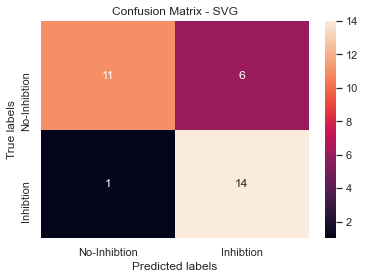

In [228]:
restart()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 58)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)



param_grid = [{"C": [0.5, 1, 10, 100],
              "gamma": ["scale", 1, 0.1, 0.01, 0.001, 0.0001],
              "kernel": ["rbf"]},
]

clf = GridSearchCV(SVC(), param_grid = param_grid, cv = 19, verbose=True, n_jobs=-1, scoring = "accuracy")
best_clf = clf.fit(X_train,y_train)
parameters = best_clf.best_params_
parameters= list(parameters.values())


SVCModel = SVC(C = parameters[0], gamma = parameters[1], kernel = parameters[2])
SVCModel.fit(X_train,y_train)
SVCModel.score(X_test, y_test)




y_pred = SVCModel.predict(X_test_scaled)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - SVG')
ax.xaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
ax.yaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
plt.show()


In [233]:
#mat = scipy.io.loadmat('G:/NI_VTA/IN_VIVO/Long_stim/JR_new/2023_02_27/2023_02_27_C_hamowanie_PStSDF_131_stym_Akt_array.mat')
len(X["base_activity"])

80

In [235]:
#restart()
restart_norm()
#X
df_modeling_v2["base_activity"]

0     6.069602
1     1.797729
2     1.797729
3     1.512254
4     6.187508
        ...   
75    0.196138
76    3.255034
77    1.374955
78    6.690342
79    1.635542
Name: base_activity, Length: 80, dtype: float64

### Logistic Regression

In [86]:
kf = KFold(n_splits=10, shuffle=True)
acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_NoInhi = np.empty((10,1))
recall_arr_Inhi = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_NoInhi = np.empty((10,1))
precision_arr_Inhi = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_NoInhi = np.empty((10,1))
f1_arr_Inhi = np.empty((10,1))

cnf_arr= []

score = np.empty((10, 1))

In [87]:
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    #print(train_index, test_index)
    restart_norm()
    clf = GridSearchCV(LogisticRegression(), 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=True, n_jobs=-1, 
                       scoring = "accuracy")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_clf = clf.fit(X_train, y_train)
    parameters= best_clf.best_params_
    parameters= list(parameters.values())
    logModel = LogisticRegression(C =  parameters[0], max_iter = parameters[1], penalty = parameters[2], solver = parameters[3])
    logModel.fit(X_train, y_train)
    y_pred = logModel.predict(X_test)
    #score[i] = logModel.score(X_test, y_test)
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    recall_arr[i] = recall_score(y_test, y_pred, average='weighted')
    print(f"Fold {i+1}/10: train: {train_index}, test: {test_index}")
    print(f"y_predict: {y_pred}")
    raport = classification_report(y_test,y_pred,output_dict=True)
    
    values_NoInhi= list(raport["0"].values())
    precision_arr_NoInhi[i] = values_NoInhi[0]
    recall_arr_NoInhi[i] = values_NoInhi[1]
    f1_arr_NoInhi[i] = values_NoInhi[2]
    
    values_Inhi= list(raport["1"].values())
    precision_arr_Inhi[i] = values_Inhi[0] 
    recall_arr_Inhi[i] = values_Inhi[1]
    f1_arr_Inhi[i] = values_Inhi[2]
    
    values_weighted_avg = list(raport["weighted avg"].values())
    #precision_arr_avg[i] = values_weighted_avg[0]
    print("clasification raport: ", raport)
    #Feature Importance
    importance = logModel.coef_[0]
    for feature, score in enumerate(importance):
        print(f"Feature: {feature}, Score: {score}")
    
print("=" * 50)    
print(acc_arr.mean())
print("f1:")
print(f1_arr.mean())
print(f1_arr_NoInhi.mean())
print(f1_arr_Inhi.mean())
print("recall:")
print(recall_arr.mean())
print(recall_arr_NoInhi.mean())
print(recall_arr_Inhi.mean())
print("precision:")
print(precision_arr.mean())
print(precision_arr_NoInhi.mean())
print(precision_arr_Inhi.mean())
print(y_pred)


list_log = ["Logistic_Regression", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_Inhi.mean(),2), round(f1_arr_NoInhi.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_Inhi.mean(),2), round(recall_arr_NoInhi.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_Inhi.mean(),2), round(precision_arr_NoInhi.mean(),2)]
df_modeling_summary.loc[2] = list_log
df_modeling_summary

Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 1/10: train: [ 0  1  2  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 27 28 29 30 31 32 33 34 36 37 38 39 40 41 42 43 44 45 46 47 48 49 52 54
 55 56 57 58 59 60 61 62 63 64 65 66 68 69 70 71 72 73 74 75 76 77 78 79], test: [ 3 25 26 35 50 51 53 67]
y_predict: [0 0 0 0 1 1 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}}
Feature: 0, Score: 42.51848754054434
Feature: 1, Score: -36.89240903968272
Feature: 2, Score: -30.3487472435651
Feature: 3, Score: 5.207840946554137
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 2/10: train: [ 0  1  2  3  4  5  6  7  8  9 12 13 14 15 16 17 18 19 20 22 23 24 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 42 43 44 45 46 47 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 70 72 73 74 75 77 78 79], test: [10 11 21 41 48 69 71 76]
y_predict: [0 0 0 0 0 1 1 1]
clasification raport:  {'0': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.888888888888889, 'support': 4}, '1': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 4}, 'accuracy': 0.875, 'macro avg': {'precision': 0.9, 'recall': 0.875, 'f1-score': 0.873015873015873, 'support': 8}, 'weighted avg': {'precision': 0.9, 'recall': 0.875, 'f1-score': 0.873015873015873, 'support': 8}}
Feature: 0, Score: 40.87733277698807
Feature: 1, Score: -36.8788268942281
Feature: 2, Score: -36.609752708900494
Feature: 3, Score: 9.243292250865887
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 3/10: train: [ 0  1  2  3  4  5  6  7  8  9 10 11 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 28 30 31 32 33 34 35 36 37 38 39 40 41 42 43 45 46 47 48 49 50 51
 52 53 54 55 56 57 58 59 60 61 62 64 66 67 68 69 70 71 73 75 76 77 78 79], test: [12 27 29 44 63 65 72 74]
y_predict: [0 0 0 1 1 1 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 3}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 5}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}}
Feature: 0, Score: 31.727772502707342
Feature: 1, Score: -28.16862092740642
Feature: 2, Score: -24.190850651480815
Feature: 3, Score: 5.270523744830375
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 4/10: train: [ 0  3  4  5  6  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25 26 27
 28 29 30 31 32 34 35 36 38 39 40 41 42 43 44 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 79], test: [ 1  2  7 15 33 37 45 78]
y_predict: [1 0 0 0 0 1 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 0.6666666666666666, 'f1-score': 0.8, 'support': 6}, '1': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 2}, 'accuracy': 0.75, 'macro avg': {'precision': 0.75, 'recall': 0.8333333333333333, 'f1-score': 0.7333333333333334, 'support': 8}, 'weighted avg': {'precision': 0.875, 'recall': 0.75, 'f1-score': 0.7666666666666667, 'support': 8}}
Feature: 0, Score: 16.52502664163071
Feature: 1, Score: -16.658676131699917
Feature: 2, Score: -13.267885872660768
Feature: 3, Score: 3.595519089860055
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 5/10: train: [ 0  1  2  3  4  6  7  9 10 11 12 13 15 16 17 18 20 21 22 23 24 25 26 27
 28 29 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 53 54
 55 56 57 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79], test: [ 5  8 14 19 30 34 52 58]
y_predict: [0 0 1 0 0 0 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 0.8333333333333334, 'f1-score': 0.9090909090909091, 'support': 6}, '1': {'precision': 0.6666666666666666, 'recall': 1.0, 'f1-score': 0.8, 'support': 2}, 'accuracy': 0.875, 'macro avg': {'precision': 0.8333333333333333, 'recall': 0.9166666666666667, 'f1-score': 0.8545454545454545, 'support': 8}, 'weighted avg': {'precision': 0.9166666666666666, 'recall': 0.875, 'f1-score': 0.8818181818181818, 'support': 8}}
Feature: 0, Score: 14.420119819379508
Feature: 1, Score: -13.68500964692839
Feature: 2, Score: -13.961378281899147
Feature: 3, Score: 3.743132421991728
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 6/10: train: [ 1  2  3  4  5  6  7  8  9 10 11 12 14 15 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 44 45 47 48 49 50 51 52
 53 54 55 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72 74 75 76 77 78 79], test: [ 0 13 31 43 46 56 68 73]
y_predict: [0 0 0 1 1 0 1 1]
clasification raport:  {'0': {'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571, 'support': 3}, '1': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 5}, 'accuracy': 0.875, 'macro avg': {'precision': 0.875, 'recall': 0.9, 'f1-score': 0.873015873015873, 'support': 8}, 'weighted avg': {'precision': 0.90625, 'recall': 0.875, 'f1-score': 0.876984126984127, 'support': 8}}
Feature: 0, Score: 29.54737921399148
Feature: 1, Score: -25.726985127211595
Feature: 2, Score: -23.889591922294606
Feature: 3, Score: 4.10381836706766
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 7/10: train: [ 0  1  2  3  4  5  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 25 26
 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 48 50 51 52
 53 54 55 56 57 58 59 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78], test: [ 6 23 24 47 49 60 61 79]
y_predict: [0 0 0 0 1 1 1 1]
clasification raport:  {'0': {'precision': 0.75, 'recall': 1.0, 'f1-score': 0.8571428571428571, 'support': 3}, '1': {'precision': 1.0, 'recall': 0.8, 'f1-score': 0.888888888888889, 'support': 5}, 'accuracy': 0.875, 'macro avg': {'precision': 0.875, 'recall': 0.9, 'f1-score': 0.873015873015873, 'support': 8}, 'weighted avg': {'precision': 0.90625, 'recall': 0.875, 'f1-score': 0.876984126984127, 'support': 8}}
Feature: 0, Score: 42.02564026603259
Feature: 1, Score: -36.31398535548911
Feature: 2, Score: -32.34817771022287
Feature: 3, Score: 5.764270664683756
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 8/10: train: [ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 19 21 23 24 25 26 27
 28 29 30 31 33 34 35 36 37 39 40 41 43 44 45 46 47 48 49 50 51 52 53 54
 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 78 79], test: [ 9 18 20 22 32 38 42 77]
y_predict: [0 0 0 0 0 0 0 0]
clasification raport:  {'0': {'precision': 0.875, 'recall': 1.0, 'f1-score': 0.9333333333333333, 'support': 7}, '1': {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 1}, 'accuracy': 0.875, 'macro avg': {'precision': 0.4375, 'recall': 0.5, 'f1-score': 0.4666666666666667, 'support': 8}, 'weighted avg': {'precision': 0.765625, 'recall': 0.875, 'f1-score': 0.8166666666666667, 'support': 8}}
Feature: 0, Score: 28.388746183777414
Feature: 1, Score: -25.73017827397363
Feature: 2, Score: -22.011434310148847
Feature: 3, Score: 5.475474819500348
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

Fold 9/10: train: [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 41 42 43 44 45 46 47 48 49 50 51
 52 53 54 55 56 58 59 60 61 62 63 64 65 67 68 69 71 72 73 74 76 77 78 79], test: [16 17 39 40 57 66 70 75]
y_predict: [1 0 0 0 1 1 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 0.75, 'f1-score': 0.8571428571428571, 'support': 4}, '1': {'precision': 0.8, 'recall': 1.0, 'f1-score': 0.888888888888889, 'support': 4}, 'accuracy': 0.875, 'macro avg': {'precision': 0.9, 'recall': 0.875, 'f1-score': 0.873015873015873, 'support': 8}, 'weighted avg': {'precision': 0.9, 'recall': 0.875, 'f1-score': 0.873015873015873, 'support': 8}}
Feature: 0, Score: 37.41668704522633
Feature: 1, Score: -33.11608138117062
Feature: 2, Score: -30.24394423855259
Feature: 3, Score: 7.048141433101044
Fitting 5 folds for each of 1600 candidates, totalling 8000 fits
Fold 10/10: train: [ 0  1  2  3  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 

C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
3600 fits failed out of a total of 8000.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
400 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\

,model,accuracy,accuracy_sem,f1-score_avg,f1-score_sem,f1-score_Inhi,f1-score_NoInhi,recall_avg,recall_sem,recall_Inhi,recall_NoInhi,precision_avg,precision_sem,precision_Inhi,precision_NoInhi
1,SVG,0.85,0.04,0.85,0.04,0.84,0.85,0.85,0.04,0.93,0.81,0.9,0.03,0.81,0.92
2,Logistic_Regression,0.89,0.02,0.89,0.02,0.79,0.89,0.89,0.02,0.84,0.89,0.92,0.01,0.78,0.92
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [149]:
restart_norm()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 58)
logModel = LogisticRegression()
param_grid = [    
    {'penalty' : ['l1', 'l2', 'elasticnet', 'none'],
    'C' : np.logspace(-4, 4, 20),
    'solver' : ['lbfgs','newton-cg','liblinear','sag','saga'],
    'max_iter' : [100, 1000,2500, 5000]
    }
]
clf = GridSearchCV(logModel, param_grid = param_grid, cv = 19, verbose=True, n_jobs=-1, scoring = "accuracy")
best_clf = clf.fit(X_train,y_train)
parameters = best_clf.best_params_
parameters= list(parameters.values())
logModel = LogisticRegression(C =  parameters[0], max_iter = parameters[1], penalty = parameters[2], solver = parameters[3])
logModel.fit(X_train,y_train)
logModel.score(X_test, y_test)

Fitting 19 folds for each of 1600 candidates, totalling 30400 fits


C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
13680 fits failed out of a total of 30400.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1520 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\gniew\anaconda3\envs\SciCompPy2021\lib\site-packages\sklea

0.84375

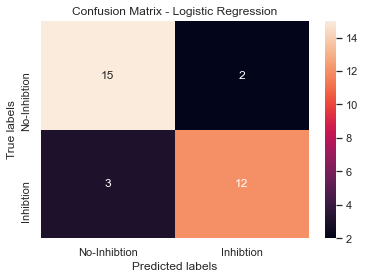

In [240]:
y_pred = logModel.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Logistic Regression')
ax.xaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
ax.yaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
plt.show()


### Random Forest

In [243]:
kf = KFold(n_splits=10, shuffle=True)
acc_arr = np.empty((10, 1))
recall_arr = np.empty((10, 1))
recall_arr_NoInhi = np.empty((10,1))
recall_arr_Inhi = np.empty((10,1))

precision_arr = np.empty((10,1))
precision_arr_NoInhi = np.empty((10,1))
precision_arr_Inhi = np.empty((10,1))

f1_arr = np.empty((10, 1))
f1_arr_NoInhi = np.empty((10,1))
f1_arr_Inhi = np.empty((10,1))

cnf_arr= []
score = np.empty((10, 1))

In [96]:
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    #print(train_index, test_index)
    restart_norm()
    clf = GridSearchCV(RandomForestClassifier(), 
                       param_grid = param_grid, 
                       cv = 5, 
                       verbose=True, n_jobs=-1, 
                       scoring = "accuracy")
    
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    best_clf = clf.fit(X_train, y_train)
    parameters= best_clf.best_params_
    parameters= list(parameters.values())
    rfcModel = RandomForestClassifier(criterion=  parameters[0], max_depth = parameters[1], max_features= parameters[2], n_estimators= parameters[3])
    rfcModel.fit(X_train, y_train)
    y_pred = rfcModel.predict(X_test)
    #score[i] =rfcModel.score(X_test, y_test)
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    recall_arr[i] = recall_score(y_test, y_pred,  average='weighted',)
    print(f"Fold {i+1}/10: train: {train_index}, test: {test_index}")
    print(f"y_predict: {y_pred}")
    
    raport = classification_report(y_test,y_pred,output_dict=True)
    
    values_NoInhi= list(raport["0"].values())
    precision_arr_NoInhi[i] = values_NoInhi[0]
    recall_arr_NoInhi[i] = values_NoInhi[1]
    f1_arr_NoInhi[i] = values_NoInhi[2]
    
    values_Inhi= list(raport["1"].values())
    precision_arr_Inhi[i] = values_Inhi[0] 
    recall_arr_Inhi[i] = values_Inhi[1]
    f1_arr_Inhi[i] = values_Inhi[2]
    
    values_weighted_avg = list(raport["weighted avg"].values())
    #precision_arr_avg[i] = values_weighted_avg[0]
    print("clasification raport: ", raport)
    importance = rfcModel.feature_importances_
    for feature, score in enumerate(importance):
        print(f"Feature: {feature}, Score: {score}")
    
print("=" * 50)    
print(acc_arr.mean())
print("f1:")
print(f1_arr.mean())
print(f1_arr_NoInhi.mean())
print(f1_arr_Inhi.mean())
print("recall:")
print(recall_arr.mean())
print(recall_arr_NoInhi.mean())
print(recall_arr_Inhi.mean())
print("precision:")
print(precision_arr.mean())
print(precision_arr_NoInhi.mean())
print(precision_arr_Inhi.mean())
print(y_pred)

list_RF = ["Random Forest", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_Inhi.mean(),2), round(f1_arr_NoInhi.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_Inhi.mean(),2), round(recall_arr_NoInhi.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_Inhi.mean(),2), round(precision_arr_NoInhi.mean(),2)]
df_modeling_summary.loc[3] = list_RF
df_modeling_summary

Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fold 1/10: train: [ 0  1  3  4  5  6  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 24 25 26
 27 28 29 30 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 51 52
 55 56 57 58 59 60 61 62 63 64 65 66 67 69 70 71 72 73 74 75 76 77 78 79], test: [ 2  7 23 31 50 53 54 68]
y_predict: [0 0 0 0 1 1 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, '1': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 4}, 'accuracy': 1.0, 'macro avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}, 'weighted avg': {'precision': 1.0, 'recall': 1.0, 'f1-score': 1.0, 'support': 8}}
Feature: 0, Score: 0.18469129986184918
Feature: 1, Score: 0.30180873732088187
Feature: 2, Score: 0.29711832102810803
Feature: 3, Score: 0.21638164178916103
Fitting 5 folds for each of 60 candidates, totalling 300 fits
Fold 2/10: train: [ 1  2  3  4  5  6  7  9 11 12 13 14 15 16 17 18 19 20 21 

Fold 10/10: train: [ 0  1  2  3  4  5  6  7  8  9 10 12 13 15 16 18 19 20 21 22 23 24 25 26
 27 28 30 31 32 33 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 62 63 65 66 67 68 69 70 71 72 73 74 75 77 78 79], test: [11 14 17 29 34 61 64 76]
y_predict: [1 1 1 0 0 1 1 1]
clasification raport:  {'0': {'precision': 1.0, 'recall': 0.4, 'f1-score': 0.5714285714285715, 'support': 5}, '1': {'precision': 0.5, 'recall': 1.0, 'f1-score': 0.6666666666666666, 'support': 3}, 'accuracy': 0.625, 'macro avg': {'precision': 0.75, 'recall': 0.7, 'f1-score': 0.6190476190476191, 'support': 8}, 'weighted avg': {'precision': 0.8125, 'recall': 0.625, 'f1-score': 0.6071428571428572, 'support': 8}}
Feature: 0, Score: 0.19317190742087087
Feature: 1, Score: 0.2776533405043209
Feature: 2, Score: 0.32756893641223694
Feature: 3, Score: 0.20160581566257138
0.6625
f1:
0.6634848484848485
0.6740043290043289
0.6288095238095238
recall:
0.6625
0.7133333333333334
0.6516666666666666
precision:


,model,accuracy,accuracy_sem,f1-score_avg,f1-score_sem,f1-score_Inhi,f1-score_NoInhi,recall_avg,recall_sem,recall_Inhi,recall_NoInhi,precision_avg,precision_sem,precision_Inhi,precision_NoInhi
1,SVG,0.86,0.04,0.86,0.04,0.79,0.83,0.86,0.04,0.81,0.83,0.89,0.03,0.8,0.88
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Random Forest,0.66,0.06,0.66,0.06,0.63,0.67,0.66,0.06,0.65,0.71,0.72,0.07,0.67,0.7
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [119]:
restart_norm()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4,  random_state = 58)
rfcModel = RandomForestClassifier()
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

clf = GridSearchCV(rfcModel, param_grid = param_grid, cv = 19, verbose=True, n_jobs=-1, scoring = "accuracy")
best_clf = clf.fit(X_train,y_train)
parameters = best_clf.best_params_
parameters= list(parameters.values())
rfcModel = RandomForestClassifier(criterion=  parameters[0], max_depth = parameters[1], max_features= parameters[2], n_estimators= parameters[3])
rfcModel.fit(X_train,y_train)
rfcModel.score(X_test, y_test)

Fitting 19 folds for each of 60 candidates, totalling 1140 fits


0.75

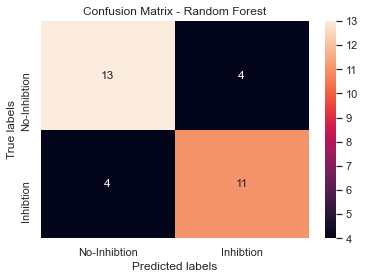

In [139]:
y_pred = rfcModel.predict(X_test)
conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)
fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Random Forest')
ax.xaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
ax.yaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
plt.show()

In [114]:
restart_norm()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 58)
X_train

NameError: name 'restart_norm' is not defined

### Neural Network

In [177]:

NN_model = keras.Sequential([
    keras.layers.Dense(10, input_shape = (4,), activation = "relu"),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dense(200, activation = "relu"),
    keras.layers.Dense(1, activation = "sigmoid"),
])
NN_model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])
NN_model.fit(X_train, y_train, epochs = 10000)

TypeError: Missing required positional argument

In [194]:
cross_validation_fold = 5
kf = KFold(n_splits=cross_validation_fold, shuffle=True)
acc_arr = np.empty((cross_validation_fold, 1))
recall_arr = np.empty((cross_validation_fold, 1))
recall_arr_NoInhi = np.empty((cross_validation_fold,1))
recall_arr_Inhi = np.empty((cross_validation_fold,1))

precision_arr = np.empty((cross_validation_fold,1))
precision_arr_NoInhi = np.empty((cross_validation_fold,1))
precision_arr_Inhi = np.empty((cross_validation_fold,1))

f1_arr = np.empty((cross_validation_fold, 1))
f1_arr_NoInhi = np.empty((cross_validation_fold,1))
f1_arr_Inhi = np.empty((cross_validation_fold,1))

cnf_arr= []
score = np.empty((cross_validation_fold, 1))

In [195]:
for i, (train_index, test_index) in enumerate(kf.split(X, y)):
    restart_norm()
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    NN_model = keras.Sequential([
    keras.layers.Dense(300, input_shape = (4,), activation = "relu"),
    keras.layers.Dense(100, activation = "relu"),
    keras.layers.Dense(200, activation = "softmax"),
    keras.layers.Dense(1000, activation = "relu"),

    keras.layers.Dense(1, activation = "sigmoid"),
])
    NN_model.compile(optimizer = "adam",
             loss = "binary_crossentropy",
             metrics = ["accuracy"])
    NN_model.fit(X_train, y_train, epochs = 3000)
    
    y_pred = NN_model.predict(X_test)
    y_pred = y_pred > 0.9
    y_pred = y_pred.astype(int)
    #score[i] =rfcModel.score(X_test, y_test)
    acc_arr[i] = accuracy_score(y_test, y_pred)
    precision_arr[i] = precision_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    f1_arr[i] = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
    recall_arr[i] = recall_score(y_test, y_pred, average='weighted',)
    print(f"Fold {i+1}/{cross_validation_fold}: train: {train_index}, test: {test_index}")
    print(f"y_predict: {y_pred}")
    
    raport = classification_report(y_test,y_pred,output_dict=True)
    
    values_NoInhi= list(raport["0"].values())
    precision_arr_NoInhi[i] = values_NoInhi[0]
    recall_arr_NoInhi[i] = values_NoInhi[1]
    f1_arr_NoInhi[i] = values_NoInhi[2]
    
    values_Inhi= list(raport["1"].values())
    precision_arr_Inhi[i] = values_Inhi[0] 
    recall_arr_Inhi[i] = values_Inhi[1]
    f1_arr_Inhi[i] = values_Inhi[2]
    
    values_weighted_avg = list(raport["weighted avg"].values())
    #precision_arr_avg[i] = values_weighted_avg[0]
    print("clasification raport: ", raport)

list_NN = ["Neural Network", round(acc_arr.mean(),2), round(float(sem(acc_arr)),2), round(f1_arr.mean(),2), round(float(sem(f1_arr)),2), round(f1_arr_Inhi.mean(),2), round(f1_arr_NoInhi.mean(),2), round(recall_arr.mean(),2), round(float(sem(recall_arr)),2), round(recall_arr_Inhi.mean(),2), round(recall_arr_NoInhi.mean(),2), round(precision_arr.mean(),2), round(float(sem(precision_arr)),2), round(precision_arr_Inhi.mean(),2), round(precision_arr_NoInhi.mean(),2)]
df_modeling_summary.loc[4] = list_NN
df_modeling_summary


Epoch 1/3000
2/2 [==============================] - 1s 7ms/step - loss: 0.6928 - accuracy: 0.4844
Epoch 2/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6915 - accuracy: 0.5469
Epoch 3/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6900 - accuracy: 0.5469
Epoch 4/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6893 - accuracy: 0.5469
Epoch 5/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6890 - accuracy: 0.5469
Epoch 6/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5469
Epoch 7/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6886 - accuracy: 0.5469
Epoch 8/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6889 - accuracy: 0.5469
Epoch 9/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6885 - accuracy: 0.5469
Epoch 10/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6887 - accuracy: 0.5469
Epoch 11/3000
2/2 [

2/2 [==============================] - 0s 5ms/step - loss: 0.1872 - accuracy: 0.9219
Epoch 166/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1873 - accuracy: 0.9062
Epoch 167/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2028 - accuracy: 0.9062
Epoch 168/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1957 - accuracy: 0.9062
Epoch 169/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1902 - accuracy: 0.9375
Epoch 170/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1889 - accuracy: 0.9219
Epoch 171/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1840 - accuracy: 0.9219
Epoch 172/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1924 - accuracy: 0.9062
Epoch 173/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1868 - accuracy: 0.9062
Epoch 174/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.1828 - accuracy: 0.9375
Epoch 175/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.1478 - accuracy: 0.9531
Epoch 248/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1450 - accuracy: 0.9531
Epoch 249/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1596 - accuracy: 0.9375
Epoch 250/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1494 - accuracy: 0.9375
Epoch 251/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1429 - accuracy: 0.9531
Epoch 252/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1542 - accuracy: 0.9375
Epoch 253/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1449 - accuracy: 0.9375
Epoch 254/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1599 - accuracy: 0.9375
Epoch 255/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1668 - accuracy: 0.9375
Epoch 256/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1479 - accuracy: 0.9375
Epoch 257/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.1011 - accuracy: 0.9688
Epoch 330/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0988 - accuracy: 0.9688
Epoch 331/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0977 - accuracy: 0.9688
Epoch 332/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0958 - accuracy: 0.9688
Epoch 333/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0947 - accuracy: 0.9688
Epoch 334/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0930 - accuracy: 0.9688
Epoch 335/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0978 - accuracy: 0.9688
Epoch 336/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1053 - accuracy: 0.9688
Epoch 337/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9688
Epoch 338/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1032 - accuracy: 0.9531
Epoch 339/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0517 - accuracy: 0.9844
Epoch 412/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0603 - accuracy: 0.9844
Epoch 413/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0525 - accuracy: 0.9844
Epoch 414/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0579 - accuracy: 1.0000
Epoch 415/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0506 - accuracy: 0.9844
Epoch 416/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0695 - accuracy: 0.9844
Epoch 417/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0546 - accuracy: 1.0000
Epoch 418/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0530 - accuracy: 0.9844
Epoch 419/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0515 - accuracy: 0.9844
Epoch 420/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0505 - accuracy: 1.0000
Epoch 421/3000


2/2 [==============================] - 0s 6ms/step - loss: 0.0271 - accuracy: 1.0000
Epoch 494/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0350 - accuracy: 0.9844
Epoch 495/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0301 - accuracy: 1.0000
Epoch 496/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0251 - accuracy: 1.0000
Epoch 497/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 498/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0255 - accuracy: 1.0000
Epoch 499/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 500/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0243 - accuracy: 1.0000
Epoch 501/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0298 - accuracy: 1.0000
Epoch 502/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0176 - accuracy: 1.0000
Epoch 503/3000


2/2 [==============================] - 0s 6ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 576/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 577/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 578/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 579/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 580/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0085 - accuracy: 1.0000
Epoch 581/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 582/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 583/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 584/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 585/3000


2/2 [==============================] - 0s 6ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 658/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 659/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 660/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 661/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 662/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 663/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0036 - accuracy: 1.0000
Epoch 664/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 665/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 666/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 667/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 740/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 741/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 742/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 743/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 744/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 745/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 746/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 747/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 748/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 749/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 822/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 823/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 824/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 825/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 826/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 827/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 828/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 829/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 830/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 831/3000


2/2 [==============================] - 0s 5ms/step - loss: 5.4672e-04 - accuracy: 1.0000
Epoch 980/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.4000e-04 - accuracy: 1.0000
Epoch 981/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.4911e-04 - accuracy: 1.0000
Epoch 982/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.3801e-04 - accuracy: 1.0000
Epoch 983/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.3512e-04 - accuracy: 1.0000
Epoch 984/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.3446e-04 - accuracy: 1.0000
Epoch 985/3000
2/2 [==============================] - 0s 7ms/step - loss: 5.2912e-04 - accuracy: 1.0000
Epoch 986/3000
2/2 [==============================] - 0s 8ms/step - loss: 5.2876e-04 - accuracy: 1.0000
Epoch 987/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.3161e-04 - accuracy: 1.0000
Epoch 988/3000
2/2 [==============================] - 0s 7ms/step - loss: 5.255

2/2 [==============================] - 0s 6ms/step - loss: 2.8827e-04 - accuracy: 1.0000
Epoch 1136/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.9032e-04 - accuracy: 1.0000
Epoch 1137/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8540e-04 - accuracy: 1.0000
Epoch 1138/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9088e-04 - accuracy: 1.0000
Epoch 1139/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8401e-04 - accuracy: 1.0000
Epoch 1140/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8482e-04 - accuracy: 1.0000
Epoch 1141/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8209e-04 - accuracy: 1.0000
Epoch 1142/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7922e-04 - accuracy: 1.0000
Epoch 1143/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8435e-04 - accuracy: 1.0000
Epoch 1144/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 6ms/step - loss: 1.6611e-04 - accuracy: 1.0000
Epoch 1292/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.6524e-04 - accuracy: 1.0000
Epoch 1293/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.6332e-04 - accuracy: 1.0000
Epoch 1294/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.6378e-04 - accuracy: 1.0000
Epoch 1295/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.6258e-04 - accuracy: 1.0000
Epoch 1296/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.6296e-04 - accuracy: 1.0000
Epoch 1297/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.6154e-04 - accuracy: 1.0000
Epoch 1298/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.6094e-04 - accuracy: 1.0000
Epoch 1299/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.6056e-04 - accuracy: 1.0000
Epoch 1300/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 9.9075e-05 - accuracy: 1.0000
Epoch 1448/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.8946e-05 - accuracy: 1.0000
Epoch 1449/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8891e-05 - accuracy: 1.0000
Epoch 1450/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8927e-05 - accuracy: 1.0000
Epoch 1451/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8230e-05 - accuracy: 1.0000
Epoch 1452/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8137e-05 - accuracy: 1.0000
Epoch 1453/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8084e-05 - accuracy: 1.0000
Epoch 1454/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.7569e-05 - accuracy: 1.0000
Epoch 1455/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.7920e-05 - accuracy: 1.0000
Epoch 1456/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 6.3743e-05 - accuracy: 1.0000
Epoch 1604/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3393e-05 - accuracy: 1.0000
Epoch 1605/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.3172e-05 - accuracy: 1.0000
Epoch 1606/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3109e-05 - accuracy: 1.0000
Epoch 1607/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.2715e-05 - accuracy: 1.0000
Epoch 1608/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2826e-05 - accuracy: 1.0000
Epoch 1609/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2450e-05 - accuracy: 1.0000
Epoch 1610/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2466e-05 - accuracy: 1.0000
Epoch 1611/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2137e-05 - accuracy: 1.0000
Epoch 1612/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 4.2783e-05 - accuracy: 1.0000
Epoch 1760/3000
2/2 [==============================] - 0s 6ms/step - loss: 4.2606e-05 - accuracy: 1.0000
Epoch 1761/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.2496e-05 - accuracy: 1.0000
Epoch 1762/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.2500e-05 - accuracy: 1.0000
Epoch 1763/3000
2/2 [==============================] - 0s 6ms/step - loss: 4.2297e-05 - accuracy: 1.0000
Epoch 1764/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.2240e-05 - accuracy: 1.0000
Epoch 1765/3000
2/2 [==============================] - 0s 6ms/step - loss: 4.2224e-05 - accuracy: 1.0000
Epoch 1766/3000
2/2 [==============================] - 0s 6ms/step - loss: 4.2077e-05 - accuracy: 1.0000
Epoch 1767/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.2023e-05 - accuracy: 1.0000
Epoch 1768/3000
2/2 [==============================] - 0s 6ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 2.9850e-05 - accuracy: 1.0000
Epoch 1916/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.9936e-05 - accuracy: 1.0000
Epoch 1917/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9733e-05 - accuracy: 1.0000
Epoch 1918/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9720e-05 - accuracy: 1.0000
Epoch 1919/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9634e-05 - accuracy: 1.0000
Epoch 1920/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9596e-05 - accuracy: 1.0000
Epoch 1921/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.9615e-05 - accuracy: 1.0000
Epoch 1922/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9529e-05 - accuracy: 1.0000
Epoch 1923/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9334e-05 - accuracy: 1.0000
Epoch 1924/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 2.1625e-05 - accuracy: 1.0000
Epoch 2072/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1464e-05 - accuracy: 1.0000
Epoch 2073/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1400e-05 - accuracy: 1.0000
Epoch 2074/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.1357e-05 - accuracy: 1.0000
Epoch 2075/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1366e-05 - accuracy: 1.0000
Epoch 2076/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1302e-05 - accuracy: 1.0000
Epoch 2077/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.1236e-05 - accuracy: 1.0000
Epoch 2078/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1199e-05 - accuracy: 1.0000
Epoch 2079/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.1130e-05 - accuracy: 1.0000
Epoch 2080/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 1.5845e-05 - accuracy: 1.0000
Epoch 2228/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5823e-05 - accuracy: 1.0000
Epoch 2229/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.5754e-05 - accuracy: 1.0000
Epoch 2230/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.5733e-05 - accuracy: 1.0000
Epoch 2231/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5737e-05 - accuracy: 1.0000
Epoch 2232/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5700e-05 - accuracy: 1.0000
Epoch 2233/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.5671e-05 - accuracy: 1.0000
Epoch 2234/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5598e-05 - accuracy: 1.0000
Epoch 2235/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.5590e-05 - accuracy: 1.0000
Epoch 2236/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 1.1861e-05 - accuracy: 1.0000
Epoch 2384/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1896e-05 - accuracy: 1.0000
Epoch 2385/3000
2/2 [==============================] - 0s 6ms/step - loss: 1.1828e-05 - accuracy: 1.0000
Epoch 2386/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1843e-05 - accuracy: 1.0000
Epoch 2387/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1793e-05 - accuracy: 1.0000
Epoch 2388/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1768e-05 - accuracy: 1.0000
Epoch 2389/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1758e-05 - accuracy: 1.0000
Epoch 2390/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1715e-05 - accuracy: 1.0000
Epoch 2391/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1712e-05 - accuracy: 1.0000
Epoch 2392/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 9.0594e-06 - accuracy: 1.0000
Epoch 2540/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.0218e-06 - accuracy: 1.0000
Epoch 2541/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.0062e-06 - accuracy: 1.0000
Epoch 2542/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.0140e-06 - accuracy: 1.0000
Epoch 2543/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.9810e-06 - accuracy: 1.0000
Epoch 2544/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.9782e-06 - accuracy: 1.0000
Epoch 2545/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.9677e-06 - accuracy: 1.0000
Epoch 2546/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.9285e-06 - accuracy: 1.0000
Epoch 2547/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.9262e-06 - accuracy: 1.0000
Epoch 2548/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 6.9752e-06 - accuracy: 1.0000
Epoch 2696/3000
2/2 [==============================] - 0s 6ms/step - loss: 6.9643e-06 - accuracy: 1.0000
Epoch 2697/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.9637e-06 - accuracy: 1.0000
Epoch 2698/3000
2/2 [==============================] - 0s 6ms/step - loss: 6.9455e-06 - accuracy: 1.0000
Epoch 2699/3000
2/2 [==============================] - 0s 6ms/step - loss: 6.9249e-06 - accuracy: 1.0000
Epoch 2700/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.9273e-06 - accuracy: 1.0000
Epoch 2701/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.9146e-06 - accuracy: 1.0000
Epoch 2702/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.9253e-06 - accuracy: 1.0000
Epoch 2703/3000
2/2 [==============================] - 0s 6ms/step - loss: 6.8919e-06 - accuracy: 1.0000
Epoch 2704/3000
2/2 [==============================] - 0s 6ms/step - lo

2/2 [==============================] - 0s 6ms/step - loss: 5.4551e-06 - accuracy: 1.0000
Epoch 2852/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.4568e-06 - accuracy: 1.0000
Epoch 2853/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.4447e-06 - accuracy: 1.0000
Epoch 2854/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.4177e-06 - accuracy: 1.0000
Epoch 2855/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.4052e-06 - accuracy: 1.0000
Epoch 2856/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.4117e-06 - accuracy: 1.0000
Epoch 2857/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.4181e-06 - accuracy: 1.0000
Epoch 2858/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.4024e-06 - accuracy: 1.0000
Epoch 2859/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3799e-06 - accuracy: 1.0000
Epoch 2860/3000
2/2 [==============================] - 0s 6ms/step - lo

Epoch 1/3000
2/2 [==============================] - 1s 6ms/step - loss: 0.6928 - accuracy: 0.5000
Epoch 2/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6917 - accuracy: 0.5312
Epoch 3/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6919 - accuracy: 0.5312
Epoch 4/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 5/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 6/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 7/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5312
Epoch 8/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6912 - accuracy: 0.5312
Epoch 9/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6911 - accuracy: 0.5312
Epoch 10/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6911 - accuracy: 0.5312
Epoch 11/3000
2/2 [

2/2 [==============================] - 0s 8ms/step - loss: 0.2080 - accuracy: 0.9062
Epoch 166/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1934 - accuracy: 0.8906
Epoch 167/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2181 - accuracy: 0.9062
Epoch 168/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2148 - accuracy: 0.9062
Epoch 169/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2122 - accuracy: 0.9062
Epoch 170/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2048 - accuracy: 0.8906
Epoch 171/3000
2/2 [==============================] - 0s 13ms/step - loss: 0.1895 - accuracy: 0.9219
Epoch 172/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1952 - accuracy: 0.9062
Epoch 173/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1797 - accuracy: 0.9219
Epoch 174/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1795 - accuracy: 0.9219
Epoch 175/3000

2/2 [==============================] - 0s 5ms/step - loss: 0.1379 - accuracy: 0.9375
Epoch 248/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1337 - accuracy: 0.9375
Epoch 249/3000
2/2 [==============================] - 0s 8ms/step - loss: 0.1233 - accuracy: 0.9375
Epoch 250/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1140 - accuracy: 0.9531
Epoch 251/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1242 - accuracy: 0.9375
Epoch 252/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.1216 - accuracy: 0.9688
Epoch 253/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1220 - accuracy: 0.9375
Epoch 254/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1136 - accuracy: 0.9219
Epoch 255/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1178 - accuracy: 0.9531
Epoch 256/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1194 - accuracy: 0.9375
Epoch 257/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0704 - accuracy: 0.9688
Epoch 330/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0590 - accuracy: 1.0000
Epoch 331/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1040 - accuracy: 0.9531
Epoch 332/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0564 - accuracy: 0.9844
Epoch 333/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0984 - accuracy: 0.9688
Epoch 334/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0673 - accuracy: 0.9844
Epoch 335/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1121 - accuracy: 0.9375
Epoch 336/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1571 - accuracy: 0.9062
Epoch 337/3000
2/2 [==============================] - 0s 7ms/step - loss: 0.0736 - accuracy: 0.9688
Epoch 338/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.1501 - accuracy: 0.9531
Epoch 339/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0205 - accuracy: 1.0000
Epoch 412/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0227 - accuracy: 1.0000
Epoch 413/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0197 - accuracy: 1.0000
Epoch 414/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0239 - accuracy: 1.0000
Epoch 415/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0228 - accuracy: 1.0000
Epoch 416/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 1.0000
Epoch 417/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0219 - accuracy: 1.0000
Epoch 418/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0187 - accuracy: 1.0000
Epoch 419/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0214 - accuracy: 1.0000
Epoch 420/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0189 - accuracy: 1.0000
Epoch 421/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 494/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 495/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0071 - accuracy: 1.0000
Epoch 496/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 497/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 498/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 499/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0069 - accuracy: 1.0000
Epoch 500/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0072 - accuracy: 1.0000
Epoch 501/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.0070 - accuracy: 1.0000
Epoch 502/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0076 - accuracy: 1.0000
Epoch 503/3000


2/2 [==============================] - 0s 4ms/step - loss: 0.0044 - accuracy: 1.0000
Epoch 576/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0039 - accuracy: 1.0000
Epoch 577/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0035 - accuracy: 1.0000
Epoch 578/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0040 - accuracy: 1.0000
Epoch 579/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 580/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 581/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0038 - accuracy: 1.0000
Epoch 582/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0037 - accuracy: 1.0000
Epoch 583/3000
2/2 [==============================] - 0s 12ms/step - loss: 0.0034 - accuracy: 1.0000
Epoch 584/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0042 - accuracy: 1.0000
Epoch 585/3000

2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 658/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 659/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 660/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 661/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 662/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 663/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 664/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 665/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 666/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 667/30

Epoch 739/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 740/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 741/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 742/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 743/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 744/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 745/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 746/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 747/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0013 - accuracy: 1.0000
Epoch 748/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000

2/2 [==============================] - 0s 5ms/step - loss: 6.2565e-04 - accuracy: 1.0000
Epoch 898/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.2302e-04 - accuracy: 1.0000
Epoch 899/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2021e-04 - accuracy: 1.0000
Epoch 900/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.1714e-04 - accuracy: 1.0000
Epoch 901/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.1245e-04 - accuracy: 1.0000
Epoch 902/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0934e-04 - accuracy: 1.0000
Epoch 903/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.0996e-04 - accuracy: 1.0000
Epoch 904/3000
2/2 [==============================] - 0s 10ms/step - loss: 6.1697e-04 - accuracy: 1.0000
Epoch 905/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.0611e-04 - accuracy: 1.0000
Epoch 906/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.51

2/2 [==============================] - 0s 4ms/step - loss: 3.5365e-04 - accuracy: 1.0000
Epoch 1054/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.5785e-04 - accuracy: 1.0000
Epoch 1055/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.4862e-04 - accuracy: 1.0000
Epoch 1056/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.4807e-04 - accuracy: 1.0000
Epoch 1057/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.5330e-04 - accuracy: 1.0000
Epoch 1058/3000
2/2 [==============================] - 0s 11ms/step - loss: 3.4996e-04 - accuracy: 1.0000
Epoch 1059/3000
2/2 [==============================] - 0s 6ms/step - loss: 3.4584e-04 - accuracy: 1.0000
Epoch 1060/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.4926e-04 - accuracy: 1.0000
Epoch 1061/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.4214e-04 - accuracy: 1.0000
Epoch 1062/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 2.6810e-04 - accuracy: 1.0000
Epoch 1132/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6800e-04 - accuracy: 1.0000
Epoch 1133/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6415e-04 - accuracy: 1.0000
Epoch 1134/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6368e-04 - accuracy: 1.0000
Epoch 1135/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6344e-04 - accuracy: 1.0000
Epoch 1136/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6104e-04 - accuracy: 1.0000
Epoch 1137/3000
2/2 [==============================] - 0s 11ms/step - loss: 2.6365e-04 - accuracy: 1.0000
Epoch 1138/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.5940e-04 - accuracy: 1.0000
Epoch 1139/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.5911e-04 - accuracy: 1.0000
Epoch 1140/3000
2/2 [==============================] - 0s 11ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 2.0320e-04 - accuracy: 1.0000
Epoch 1210/3000
2/2 [==============================] - 0s 10ms/step - loss: 2.0202e-04 - accuracy: 1.0000
Epoch 1211/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.0327e-04 - accuracy: 1.0000
Epoch 1212/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.0049e-04 - accuracy: 1.0000
Epoch 1213/3000
2/2 [==============================] - 0s 10ms/step - loss: 2.0044e-04 - accuracy: 1.0000
Epoch 1214/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9890e-04 - accuracy: 1.0000
Epoch 1215/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9882e-04 - accuracy: 1.0000
Epoch 1216/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9882e-04 - accuracy: 1.0000
Epoch 1217/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.0019e-04 - accuracy: 1.0000
Epoch 1218/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 1.5609e-04 - accuracy: 1.0000
Epoch 1288/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.5516e-04 - accuracy: 1.0000
Epoch 1289/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5559e-04 - accuracy: 1.0000
Epoch 1290/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5463e-04 - accuracy: 1.0000
Epoch 1291/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5345e-04 - accuracy: 1.0000
Epoch 1292/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5320e-04 - accuracy: 1.0000
Epoch 1293/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.5258e-04 - accuracy: 1.0000
Epoch 1294/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5253e-04 - accuracy: 1.0000
Epoch 1295/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5196e-04 - accuracy: 1.0000
Epoch 1296/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 1.2173e-04 - accuracy: 1.0000
Epoch 1366/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2196e-04 - accuracy: 1.0000
Epoch 1367/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2142e-04 - accuracy: 1.0000
Epoch 1368/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2085e-04 - accuracy: 1.0000
Epoch 1369/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2009e-04 - accuracy: 1.0000
Epoch 1370/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1983e-04 - accuracy: 1.0000
Epoch 1371/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1973e-04 - accuracy: 1.0000
Epoch 1372/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2011e-04 - accuracy: 1.0000
Epoch 1373/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1947e-04 - accuracy: 1.0000
Epoch 1374/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 7.8160e-05 - accuracy: 1.0000
Epoch 1522/3000
2/2 [==============================] - 0s 9ms/step - loss: 7.8035e-05 - accuracy: 1.0000
Epoch 1523/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.7904e-05 - accuracy: 1.0000
Epoch 1524/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.7798e-05 - accuracy: 1.0000
Epoch 1525/3000
2/2 [==============================] - 0s 10ms/step - loss: 7.7636e-05 - accuracy: 1.0000
Epoch 1526/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.7239e-05 - accuracy: 1.0000
Epoch 1527/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.7089e-05 - accuracy: 1.0000
Epoch 1528/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.6792e-05 - accuracy: 1.0000
Epoch 1529/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.6565e-05 - accuracy: 1.0000
Epoch 1530/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 6.4194e-05 - accuracy: 1.0000
Epoch 1600/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.4220e-05 - accuracy: 1.0000
Epoch 1601/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.5002e-05 - accuracy: 1.0000
Epoch 1602/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.3988e-05 - accuracy: 1.0000
Epoch 1603/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3517e-05 - accuracy: 1.0000
Epoch 1604/3000
2/2 [==============================] - 0s 10ms/step - loss: 6.3564e-05 - accuracy: 1.0000
Epoch 1605/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3395e-05 - accuracy: 1.0000
Epoch 1606/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2850e-05 - accuracy: 1.0000
Epoch 1607/3000
2/2 [==============================] - 0s 10ms/step - loss: 6.2879e-05 - accuracy: 1.0000
Epoch 1608/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 11ms/step - loss: 5.2957e-05 - accuracy: 1.0000
Epoch 1678/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2777e-05 - accuracy: 1.0000
Epoch 1679/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.2708e-05 - accuracy: 1.0000
Epoch 1680/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3033e-05 - accuracy: 1.0000
Epoch 1681/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2513e-05 - accuracy: 1.0000
Epoch 1682/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.2324e-05 - accuracy: 1.0000
Epoch 1683/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2052e-05 - accuracy: 1.0000
Epoch 1684/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.2221e-05 - accuracy: 1.0000
Epoch 1685/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2018e-05 - accuracy: 1.0000
Epoch 1686/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 4.4102e-05 - accuracy: 1.0000
Epoch 1756/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.4256e-05 - accuracy: 1.0000
Epoch 1757/3000
2/2 [==============================] - 0s 11ms/step - loss: 4.3872e-05 - accuracy: 1.0000
Epoch 1758/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.3799e-05 - accuracy: 1.0000
Epoch 1759/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.3700e-05 - accuracy: 1.0000
Epoch 1760/3000
2/2 [==============================] - 0s 9ms/step - loss: 4.4038e-05 - accuracy: 1.0000
Epoch 1761/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.3718e-05 - accuracy: 1.0000
Epoch 1762/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.3556e-05 - accuracy: 1.0000
Epoch 1763/3000
2/2 [==============================] - 0s 10ms/step - loss: 4.3317e-05 - accuracy: 1.0000
Epoch 1764/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 3.7562e-05 - accuracy: 1.0000
Epoch 1834/3000
2/2 [==============================] - 0s 10ms/step - loss: 3.6971e-05 - accuracy: 1.0000
Epoch 1835/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.6956e-05 - accuracy: 1.0000
Epoch 1836/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.7072e-05 - accuracy: 1.0000
Epoch 1837/3000
2/2 [==============================] - 0s 11ms/step - loss: 3.6739e-05 - accuracy: 1.0000
Epoch 1838/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.6996e-05 - accuracy: 1.0000
Epoch 1839/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.6960e-05 - accuracy: 1.0000
Epoch 1840/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.6622e-05 - accuracy: 1.0000
Epoch 1841/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.6504e-05 - accuracy: 1.0000
Epoch 1842/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 3.1449e-05 - accuracy: 1.0000
Epoch 1912/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1327e-05 - accuracy: 1.0000
Epoch 1913/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1560e-05 - accuracy: 1.0000
Epoch 1914/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1319e-05 - accuracy: 1.0000
Epoch 1915/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1239e-05 - accuracy: 1.0000
Epoch 1916/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1174e-05 - accuracy: 1.0000
Epoch 1917/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1333e-05 - accuracy: 1.0000
Epoch 1918/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.1122e-05 - accuracy: 1.0000
Epoch 1919/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1121e-05 - accuracy: 1.0000
Epoch 1920/3000
2/2 [==============================] - 0s 9ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 2.6911e-05 - accuracy: 1.0000
Epoch 1990/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6775e-05 - accuracy: 1.0000
Epoch 1991/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6744e-05 - accuracy: 1.0000
Epoch 1992/3000
2/2 [==============================] - 0s 11ms/step - loss: 2.6743e-05 - accuracy: 1.0000
Epoch 1993/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6690e-05 - accuracy: 1.0000
Epoch 1994/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6548e-05 - accuracy: 1.0000
Epoch 1995/3000
2/2 [==============================] - 0s 11ms/step - loss: 2.6491e-05 - accuracy: 1.0000
Epoch 1996/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6536e-05 - accuracy: 1.0000
Epoch 1997/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6374e-05 - accuracy: 1.0000
Epoch 1998/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 2.3049e-05 - accuracy: 1.0000
Epoch 2068/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2970e-05 - accuracy: 1.0000
Epoch 2069/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2959e-05 - accuracy: 1.0000
Epoch 2070/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2917e-05 - accuracy: 1.0000
Epoch 2071/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2844e-05 - accuracy: 1.0000
Epoch 2072/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2802e-05 - accuracy: 1.0000
Epoch 2073/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2801e-05 - accuracy: 1.0000
Epoch 2074/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2709e-05 - accuracy: 1.0000
Epoch 2075/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2752e-05 - accuracy: 1.0000
Epoch 2076/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 1.9935e-05 - accuracy: 1.0000
Epoch 2146/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9897e-05 - accuracy: 1.0000
Epoch 2147/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9852e-05 - accuracy: 1.0000
Epoch 2148/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9804e-05 - accuracy: 1.0000
Epoch 2149/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9824e-05 - accuracy: 1.0000
Epoch 2150/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.9721e-05 - accuracy: 1.0000
Epoch 2151/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9719e-05 - accuracy: 1.0000
Epoch 2152/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9687e-05 - accuracy: 1.0000
Epoch 2153/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9576e-05 - accuracy: 1.0000
Epoch 2154/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 9ms/step - loss: 1.7340e-05 - accuracy: 1.0000
Epoch 2224/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.7283e-05 - accuracy: 1.0000
Epoch 2225/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7386e-05 - accuracy: 1.0000
Epoch 2226/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7174e-05 - accuracy: 1.0000
Epoch 2227/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.7159e-05 - accuracy: 1.0000
Epoch 2228/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.7104e-05 - accuracy: 1.0000
Epoch 2229/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7108e-05 - accuracy: 1.0000
Epoch 2230/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7081e-05 - accuracy: 1.0000
Epoch 2231/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.7051e-05 - accuracy: 1.0000
Epoch 2232/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 1.5127e-05 - accuracy: 1.0000
Epoch 2302/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5065e-05 - accuracy: 1.0000
Epoch 2303/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5026e-05 - accuracy: 1.0000
Epoch 2304/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5068e-05 - accuracy: 1.0000
Epoch 2305/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5042e-05 - accuracy: 1.0000
Epoch 2306/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.4948e-05 - accuracy: 1.0000
Epoch 2307/3000
2/2 [==============================] - 0s 13ms/step - loss: 1.4913e-05 - accuracy: 1.0000
Epoch 2308/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.4943e-05 - accuracy: 1.0000
Epoch 2309/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5033e-05 - accuracy: 1.0000
Epoch 2310/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 1.3213e-05 - accuracy: 1.0000
Epoch 2380/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3197e-05 - accuracy: 1.0000
Epoch 2381/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3146e-05 - accuracy: 1.0000
Epoch 2382/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3159e-05 - accuracy: 1.0000
Epoch 2383/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.3111e-05 - accuracy: 1.0000
Epoch 2384/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.3087e-05 - accuracy: 1.0000
Epoch 2385/3000
2/2 [==============================] - 0s 12ms/step - loss: 1.3084e-05 - accuracy: 1.0000
Epoch 2386/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3035e-05 - accuracy: 1.0000
Epoch 2387/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.3096e-05 - accuracy: 1.0000
Epoch 2388/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 1.1610e-05 - accuracy: 1.0000
Epoch 2458/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1581e-05 - accuracy: 1.0000
Epoch 2459/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1561e-05 - accuracy: 1.0000
Epoch 2460/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1545e-05 - accuracy: 1.0000
Epoch 2461/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1561e-05 - accuracy: 1.0000
Epoch 2462/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1490e-05 - accuracy: 1.0000
Epoch 2463/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1464e-05 - accuracy: 1.0000
Epoch 2464/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1449e-05 - accuracy: 1.0000
Epoch 2465/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1455e-05 - accuracy: 1.0000
Epoch 2466/3000
2/2 [==============================] - 0s 9ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 9.0717e-06 - accuracy: 1.0000
Epoch 2614/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.0644e-06 - accuracy: 1.0000
Epoch 2615/3000
2/2 [==============================] - 0s 11ms/step - loss: 9.0253e-06 - accuracy: 1.0000
Epoch 2616/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.0016e-06 - accuracy: 1.0000
Epoch 2617/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.0096e-06 - accuracy: 1.0000
Epoch 2618/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.9917e-06 - accuracy: 1.0000
Epoch 2619/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.9867e-06 - accuracy: 1.0000
Epoch 2620/3000
2/2 [==============================] - 0s 9ms/step - loss: 8.9615e-06 - accuracy: 1.0000
Epoch 2621/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.9552e-06 - accuracy: 1.0000
Epoch 2622/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 9ms/step - loss: 8.0014e-06 - accuracy: 1.0000
Epoch 2692/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9974e-06 - accuracy: 1.0000
Epoch 2693/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.0235e-06 - accuracy: 1.0000
Epoch 2694/3000
2/2 [==============================] - 0s 10ms/step - loss: 7.9857e-06 - accuracy: 1.0000
Epoch 2695/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9633e-06 - accuracy: 1.0000
Epoch 2696/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9575e-06 - accuracy: 1.0000
Epoch 2697/3000
2/2 [==============================] - 0s 10ms/step - loss: 7.9360e-06 - accuracy: 1.0000
Epoch 2698/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9249e-06 - accuracy: 1.0000
Epoch 2699/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9220e-06 - accuracy: 1.0000
Epoch 2700/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 7.1339e-06 - accuracy: 1.0000
Epoch 2770/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.1047e-06 - accuracy: 1.0000
Epoch 2771/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.1418e-06 - accuracy: 1.0000
Epoch 2772/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.0906e-06 - accuracy: 1.0000
Epoch 2773/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.0675e-06 - accuracy: 1.0000
Epoch 2774/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.0521e-06 - accuracy: 1.0000
Epoch 2775/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.0476e-06 - accuracy: 1.0000
Epoch 2776/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.0368e-06 - accuracy: 1.0000
Epoch 2777/3000
2/2 [==============================] - 0s 6ms/step - loss: 7.0878e-06 - accuracy: 1.0000
Epoch 2778/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 6.3142e-06 - accuracy: 1.0000
Epoch 2848/3000
2/2 [==============================] - 0s 10ms/step - loss: 6.3406e-06 - accuracy: 1.0000
Epoch 2849/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3031e-06 - accuracy: 1.0000
Epoch 2850/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.3093e-06 - accuracy: 1.0000
Epoch 2851/3000
2/2 [==============================] - 0s 9ms/step - loss: 6.2987e-06 - accuracy: 1.0000
Epoch 2852/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2866e-06 - accuracy: 1.0000
Epoch 2853/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2794e-06 - accuracy: 1.0000
Epoch 2854/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2526e-06 - accuracy: 1.0000
Epoch 2855/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.2739e-06 - accuracy: 1.0000
Epoch 2856/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 5.6312e-06 - accuracy: 1.0000
Epoch 2926/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.6307e-06 - accuracy: 1.0000
Epoch 2927/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.6043e-06 - accuracy: 1.0000
Epoch 2928/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.6001e-06 - accuracy: 1.0000
Epoch 2929/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.5974e-06 - accuracy: 1.0000
Epoch 2930/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.5876e-06 - accuracy: 1.0000
Epoch 2931/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.5890e-06 - accuracy: 1.0000
Epoch 2932/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.5668e-06 - accuracy: 1.0000
Epoch 2933/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.5738e-06 - accuracy: 1.0000
Epoch 2934/3000
2/2 [==============================] - 0s 5ms/step - lo

Epoch 1/3000
2/2 [==============================] - 1s 6ms/step - loss: 0.6912 - accuracy: 0.5469
Epoch 2/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.6881 - accuracy: 0.5781
Epoch 3/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6853 - accuracy: 0.5781
Epoch 4/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6841 - accuracy: 0.5781
Epoch 5/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6824 - accuracy: 0.5781
Epoch 6/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6823 - accuracy: 0.5781
Epoch 7/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6812 - accuracy: 0.5781
Epoch 8/3000
2/2 [==============================] - 0s 6ms/step - loss: 0.6804 - accuracy: 0.5781
Epoch 9/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.6805 - accuracy: 0.5781
Epoch 10/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.6807 - accuracy: 0.5781
Epoch 11/3000
2/2 

2/2 [==============================] - 0s 4ms/step - loss: 0.0866 - accuracy: 0.9844
Epoch 166/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0860 - accuracy: 0.9844
Epoch 167/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0840 - accuracy: 0.9844
Epoch 168/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0847 - accuracy: 0.9844
Epoch 169/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0822 - accuracy: 0.9844
Epoch 170/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0763 - accuracy: 0.9844
Epoch 171/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9844
Epoch 172/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.0752 - accuracy: 0.9844
Epoch 173/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0837 - accuracy: 0.9844
Epoch 174/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0766 - accuracy: 0.9844
Epoch 175/3000


2/2 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9844
Epoch 248/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0474 - accuracy: 0.9844
Epoch 249/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0470 - accuracy: 0.9844
Epoch 250/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0466 - accuracy: 0.9844
Epoch 251/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.0465 - accuracy: 0.9844
Epoch 252/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0465 - accuracy: 0.9844
Epoch 253/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0463 - accuracy: 0.9844
Epoch 254/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0467 - accuracy: 0.9844
Epoch 255/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0462 - accuracy: 0.9844
Epoch 256/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0463 - accuracy: 0.9844
Epoch 257/3000


2/2 [==============================] - 0s 4ms/step - loss: 0.0262 - accuracy: 0.9844
Epoch 330/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0460 - accuracy: 0.9844
Epoch 331/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0200 - accuracy: 1.0000
Epoch 332/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1093 - accuracy: 0.9375
Epoch 333/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1522 - accuracy: 0.9219
Epoch 334/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1016 - accuracy: 0.9688
Epoch 335/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0254 - accuracy: 1.0000
Epoch 336/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0542 - accuracy: 0.9531
Epoch 337/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0353 - accuracy: 0.9844
Epoch 338/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1148 - accuracy: 0.9375
Epoch 339/3000

2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 412/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 413/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 414/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 415/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 416/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 417/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 418/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0011 - accuracy: 1.0000
Epoch 419/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 420/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 421/3000


2/2 [==============================] - 0s 5ms/step - loss: 2.0473e-04 - accuracy: 1.0000
Epoch 569/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.0685e-04 - accuracy: 1.0000
Epoch 570/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.0319e-04 - accuracy: 1.0000
Epoch 571/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.0082e-04 - accuracy: 1.0000
Epoch 572/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9789e-04 - accuracy: 1.0000
Epoch 573/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9688e-04 - accuracy: 1.0000
Epoch 574/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9502e-04 - accuracy: 1.0000
Epoch 575/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9465e-04 - accuracy: 1.0000
Epoch 576/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.9187e-04 - accuracy: 1.0000
Epoch 577/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.90

2/2 [==============================] - 0s 4ms/step - loss: 6.7679e-05 - accuracy: 1.0000
Epoch 725/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.7224e-05 - accuracy: 1.0000
Epoch 726/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.7438e-05 - accuracy: 1.0000
Epoch 727/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.7560e-05 - accuracy: 1.0000
Epoch 728/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.5963e-05 - accuracy: 1.0000
Epoch 729/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.6824e-05 - accuracy: 1.0000
Epoch 730/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.5937e-05 - accuracy: 1.0000
Epoch 731/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.4786e-05 - accuracy: 1.0000
Epoch 732/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.4651e-05 - accuracy: 1.0000
Epoch 733/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.361

2/2 [==============================] - 0s 4ms/step - loss: 2.6920e-05 - accuracy: 1.0000
Epoch 881/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6640e-05 - accuracy: 1.0000
Epoch 882/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6535e-05 - accuracy: 1.0000
Epoch 883/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6423e-05 - accuracy: 1.0000
Epoch 884/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6311e-05 - accuracy: 1.0000
Epoch 885/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6165e-05 - accuracy: 1.0000
Epoch 886/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.5993e-05 - accuracy: 1.0000
Epoch 887/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.5843e-05 - accuracy: 1.0000
Epoch 888/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.5924e-05 - accuracy: 1.0000
Epoch 889/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.572

2/2 [==============================] - 0s 5ms/step - loss: 1.2665e-05 - accuracy: 1.0000
Epoch 1037/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2569e-05 - accuracy: 1.0000
Epoch 1038/3000
2/2 [==============================] - 0s 11ms/step - loss: 1.2502e-05 - accuracy: 1.0000
Epoch 1039/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2545e-05 - accuracy: 1.0000
Epoch 1040/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2423e-05 - accuracy: 1.0000
Epoch 1041/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.2358e-05 - accuracy: 1.0000
Epoch 1042/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2386e-05 - accuracy: 1.0000
Epoch 1043/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2336e-05 - accuracy: 1.0000
Epoch 1044/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2190e-05 - accuracy: 1.0000
Epoch 1045/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 9.2332e-06 - accuracy: 1.0000
Epoch 1115/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.1551e-06 - accuracy: 1.0000
Epoch 1116/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.1652e-06 - accuracy: 1.0000
Epoch 1117/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.0827e-06 - accuracy: 1.0000
Epoch 1118/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.0648e-06 - accuracy: 1.0000
Epoch 1119/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.0156e-06 - accuracy: 1.0000
Epoch 1120/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.9857e-06 - accuracy: 1.0000
Epoch 1121/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.9776e-06 - accuracy: 1.0000
Epoch 1122/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.9195e-06 - accuracy: 1.0000
Epoch 1123/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 6.9092e-06 - accuracy: 1.0000
Epoch 1193/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.9135e-06 - accuracy: 1.0000
Epoch 1194/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.8785e-06 - accuracy: 1.0000
Epoch 1195/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.8530e-06 - accuracy: 1.0000
Epoch 1196/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.8237e-06 - accuracy: 1.0000
Epoch 1197/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.7968e-06 - accuracy: 1.0000
Epoch 1198/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.7900e-06 - accuracy: 1.0000
Epoch 1199/3000
2/2 [==============================] - 0s 10ms/step - loss: 6.7412e-06 - accuracy: 1.0000
Epoch 1200/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.7218e-06 - accuracy: 1.0000
Epoch 1201/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 6ms/step - loss: 5.3473e-06 - accuracy: 1.0000
Epoch 1271/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.3362e-06 - accuracy: 1.0000
Epoch 1272/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3022e-06 - accuracy: 1.0000
Epoch 1273/3000
2/2 [==============================] - 0s 9ms/step - loss: 5.2902e-06 - accuracy: 1.0000
Epoch 1274/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2672e-06 - accuracy: 1.0000
Epoch 1275/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2516e-06 - accuracy: 1.0000
Epoch 1276/3000
2/2 [==============================] - 0s 10ms/step - loss: 5.2616e-06 - accuracy: 1.0000
Epoch 1277/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.2343e-06 - accuracy: 1.0000
Epoch 1278/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.2045e-06 - accuracy: 1.0000
Epoch 1279/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 4.2139e-06 - accuracy: 1.0000
Epoch 1349/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.2027e-06 - accuracy: 1.0000
Epoch 1350/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.2066e-06 - accuracy: 1.0000
Epoch 1351/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.1789e-06 - accuracy: 1.0000
Epoch 1352/3000
2/2 [==============================] - 0s 10ms/step - loss: 4.1687e-06 - accuracy: 1.0000
Epoch 1353/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.1561e-06 - accuracy: 1.0000
Epoch 1354/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.1426e-06 - accuracy: 1.0000
Epoch 1355/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.1294e-06 - accuracy: 1.0000
Epoch 1356/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.1190e-06 - accuracy: 1.0000
Epoch 1357/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 9ms/step - loss: 3.4031e-06 - accuracy: 1.0000
Epoch 1427/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3836e-06 - accuracy: 1.0000
Epoch 1428/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3724e-06 - accuracy: 1.0000
Epoch 1429/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3700e-06 - accuracy: 1.0000
Epoch 1430/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3565e-06 - accuracy: 1.0000
Epoch 1431/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3464e-06 - accuracy: 1.0000
Epoch 1432/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3414e-06 - accuracy: 1.0000
Epoch 1433/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3272e-06 - accuracy: 1.0000
Epoch 1434/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3338e-06 - accuracy: 1.0000
Epoch 1435/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 2.7736e-06 - accuracy: 1.0000
Epoch 1505/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7692e-06 - accuracy: 1.0000
Epoch 1506/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7636e-06 - accuracy: 1.0000
Epoch 1507/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7511e-06 - accuracy: 1.0000
Epoch 1508/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7492e-06 - accuracy: 1.0000
Epoch 1509/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7420e-06 - accuracy: 1.0000
Epoch 1510/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7387e-06 - accuracy: 1.0000
Epoch 1511/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7239e-06 - accuracy: 1.0000
Epoch 1512/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7165e-06 - accuracy: 1.0000
Epoch 1513/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 2.3029e-06 - accuracy: 1.0000
Epoch 1583/3000
2/2 [==============================] - 0s 10ms/step - loss: 2.2916e-06 - accuracy: 1.0000
Epoch 1584/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2845e-06 - accuracy: 1.0000
Epoch 1585/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2799e-06 - accuracy: 1.0000
Epoch 1586/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2744e-06 - accuracy: 1.0000
Epoch 1587/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2682e-06 - accuracy: 1.0000
Epoch 1588/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2668e-06 - accuracy: 1.0000
Epoch 1589/3000
2/2 [==============================] - 0s 11ms/step - loss: 2.2666e-06 - accuracy: 1.0000
Epoch 1590/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2539e-06 - accuracy: 1.0000
Epoch 1591/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 1.9225e-06 - accuracy: 1.0000
Epoch 1661/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9195e-06 - accuracy: 1.0000
Epoch 1662/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9150e-06 - accuracy: 1.0000
Epoch 1663/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9166e-06 - accuracy: 1.0000
Epoch 1664/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9068e-06 - accuracy: 1.0000
Epoch 1665/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9053e-06 - accuracy: 1.0000
Epoch 1666/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9030e-06 - accuracy: 1.0000
Epoch 1667/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.8950e-06 - accuracy: 1.0000
Epoch 1668/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.8899e-06 - accuracy: 1.0000
Epoch 1669/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 1.6307e-06 - accuracy: 1.0000
Epoch 1739/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.6262e-06 - accuracy: 1.0000
Epoch 1740/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.6207e-06 - accuracy: 1.0000
Epoch 1741/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6164e-06 - accuracy: 1.0000
Epoch 1742/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6145e-06 - accuracy: 1.0000
Epoch 1743/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.6119e-06 - accuracy: 1.0000
Epoch 1744/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6074e-06 - accuracy: 1.0000
Epoch 1745/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6041e-06 - accuracy: 1.0000
Epoch 1746/3000
2/2 [==============================] - 0s 9ms/step - loss: 1.6059e-06 - accuracy: 1.0000
Epoch 1747/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 1.3878e-06 - accuracy: 1.0000
Epoch 1817/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.3854e-06 - accuracy: 1.0000
Epoch 1818/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.3870e-06 - accuracy: 1.0000
Epoch 1819/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3821e-06 - accuracy: 1.0000
Epoch 1820/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3780e-06 - accuracy: 1.0000
Epoch 1821/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3790e-06 - accuracy: 1.0000
Epoch 1822/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3727e-06 - accuracy: 1.0000
Epoch 1823/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3703e-06 - accuracy: 1.0000
Epoch 1824/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3708e-06 - accuracy: 1.0000
Epoch 1825/3000
2/2 [==============================] - 0s 10ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 1.1942e-06 - accuracy: 1.0000
Epoch 1895/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1916e-06 - accuracy: 1.0000
Epoch 1896/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1894e-06 - accuracy: 1.0000
Epoch 1897/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1864e-06 - accuracy: 1.0000
Epoch 1898/3000
2/2 [==============================] - 0s 11ms/step - loss: 1.1877e-06 - accuracy: 1.0000
Epoch 1899/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1827e-06 - accuracy: 1.0000
Epoch 1900/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1801e-06 - accuracy: 1.0000
Epoch 1901/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1799e-06 - accuracy: 1.0000
Epoch 1902/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1776e-06 - accuracy: 1.0000
Epoch 1903/3000
2/2 [==============================] - 0s 10ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 1.0327e-06 - accuracy: 1.0000
Epoch 1973/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0307e-06 - accuracy: 1.0000
Epoch 1974/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0294e-06 - accuracy: 1.0000
Epoch 1975/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0279e-06 - accuracy: 1.0000
Epoch 1976/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.0254e-06 - accuracy: 1.0000
Epoch 1977/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0267e-06 - accuracy: 1.0000
Epoch 1978/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0255e-06 - accuracy: 1.0000
Epoch 1979/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.0207e-06 - accuracy: 1.0000
Epoch 1980/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.0182e-06 - accuracy: 1.0000
Epoch 1981/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 7.8692e-07 - accuracy: 1.0000
Epoch 2129/3000
2/2 [==============================] - 0s 8ms/step - loss: 7.8688e-07 - accuracy: 1.0000
Epoch 2130/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.8503e-07 - accuracy: 1.0000
Epoch 2131/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.8408e-07 - accuracy: 1.0000
Epoch 2132/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8103e-07 - accuracy: 1.0000
Epoch 2133/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8083e-07 - accuracy: 1.0000
Epoch 2134/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.8043e-07 - accuracy: 1.0000
Epoch 2135/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.7782e-07 - accuracy: 1.0000
Epoch 2136/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.7754e-07 - accuracy: 1.0000
Epoch 2137/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 6.1028e-07 - accuracy: 1.0000
Epoch 2285/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.1065e-07 - accuracy: 1.0000
Epoch 2286/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.1090e-07 - accuracy: 1.0000
Epoch 2287/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0910e-07 - accuracy: 1.0000
Epoch 2288/3000
2/2 [==============================] - 0s 9ms/step - loss: 6.0748e-07 - accuracy: 1.0000
Epoch 2289/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.0597e-07 - accuracy: 1.0000
Epoch 2290/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0479e-07 - accuracy: 1.0000
Epoch 2291/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.0496e-07 - accuracy: 1.0000
Epoch 2292/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0339e-07 - accuracy: 1.0000
Epoch 2293/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 5.4188e-07 - accuracy: 1.0000
Epoch 2363/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.3999e-07 - accuracy: 1.0000
Epoch 2364/3000
2/2 [==============================] - 0s 6ms/step - loss: 5.3933e-07 - accuracy: 1.0000
Epoch 2365/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.3987e-07 - accuracy: 1.0000
Epoch 2366/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3778e-07 - accuracy: 1.0000
Epoch 2367/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.3678e-07 - accuracy: 1.0000
Epoch 2368/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3614e-07 - accuracy: 1.0000
Epoch 2369/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3540e-07 - accuracy: 1.0000
Epoch 2370/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.3449e-07 - accuracy: 1.0000
Epoch 2371/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 4.8121e-07 - accuracy: 1.0000
Epoch 2441/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.8029e-07 - accuracy: 1.0000
Epoch 2442/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.7968e-07 - accuracy: 1.0000
Epoch 2443/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.7879e-07 - accuracy: 1.0000
Epoch 2444/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.7901e-07 - accuracy: 1.0000
Epoch 2445/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.7744e-07 - accuracy: 1.0000
Epoch 2446/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.7772e-07 - accuracy: 1.0000
Epoch 2447/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.7607e-07 - accuracy: 1.0000
Epoch 2448/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.7549e-07 - accuracy: 1.0000
Epoch 2449/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 3.8426e-07 - accuracy: 1.0000
Epoch 2597/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8368e-07 - accuracy: 1.0000
Epoch 2598/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8297e-07 - accuracy: 1.0000
Epoch 2599/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8314e-07 - accuracy: 1.0000
Epoch 2600/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8296e-07 - accuracy: 1.0000
Epoch 2601/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.8177e-07 - accuracy: 1.0000
Epoch 2602/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8208e-07 - accuracy: 1.0000
Epoch 2603/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8041e-07 - accuracy: 1.0000
Epoch 2604/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.7992e-07 - accuracy: 1.0000
Epoch 2605/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 3.4486e-07 - accuracy: 1.0000
Epoch 2675/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.4439e-07 - accuracy: 1.0000
Epoch 2676/3000
2/2 [==============================] - 0s 10ms/step - loss: 3.4386e-07 - accuracy: 1.0000
Epoch 2677/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.4333e-07 - accuracy: 1.0000
Epoch 2678/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.4324e-07 - accuracy: 1.0000
Epoch 2679/3000
2/2 [==============================] - 0s 10ms/step - loss: 3.4320e-07 - accuracy: 1.0000
Epoch 2680/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.4200e-07 - accuracy: 1.0000
Epoch 2681/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.4200e-07 - accuracy: 1.0000
Epoch 2682/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.4155e-07 - accuracy: 1.0000
Epoch 2683/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 3.1032e-07 - accuracy: 1.0000
Epoch 2753/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1041e-07 - accuracy: 1.0000
Epoch 2754/3000
2/2 [==============================] - 0s 11ms/step - loss: 3.1023e-07 - accuracy: 1.0000
Epoch 2755/3000
2/2 [==============================] - 0s 6ms/step - loss: 3.0939e-07 - accuracy: 1.0000
Epoch 2756/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0961e-07 - accuracy: 1.0000
Epoch 2757/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0877e-07 - accuracy: 1.0000
Epoch 2758/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0788e-07 - accuracy: 1.0000
Epoch 2759/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0741e-07 - accuracy: 1.0000
Epoch 2760/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0697e-07 - accuracy: 1.0000
Epoch 2761/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 2.7987e-07 - accuracy: 1.0000
Epoch 2831/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8016e-07 - accuracy: 1.0000
Epoch 2832/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7913e-07 - accuracy: 1.0000
Epoch 2833/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7899e-07 - accuracy: 1.0000
Epoch 2834/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7841e-07 - accuracy: 1.0000
Epoch 2835/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7846e-07 - accuracy: 1.0000
Epoch 2836/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7776e-07 - accuracy: 1.0000
Epoch 2837/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.7735e-07 - accuracy: 1.0000
Epoch 2838/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7701e-07 - accuracy: 1.0000
Epoch 2839/3000
2/2 [==============================] - 0s 12ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 2.5338e-07 - accuracy: 1.0000
Epoch 2909/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.5270e-07 - accuracy: 1.0000
Epoch 2910/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.5238e-07 - accuracy: 1.0000
Epoch 2911/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.5196e-07 - accuracy: 1.0000
Epoch 2912/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.5207e-07 - accuracy: 1.0000
Epoch 2913/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.5225e-07 - accuracy: 1.0000
Epoch 2914/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.5111e-07 - accuracy: 1.0000
Epoch 2915/3000
2/2 [==============================] - 0s 11ms/step - loss: 2.5075e-07 - accuracy: 1.0000
Epoch 2916/3000
2/2 [==============================] - 0s 6ms/step - loss: 2.5036e-07 - accuracy: 1.0000
Epoch 2917/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 0.3691 - accuracy: 0.8594
Epoch 60/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.3581 - accuracy: 0.8438
Epoch 61/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.3448 - accuracy: 0.8750
Epoch 62/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.3323 - accuracy: 0.8750
Epoch 63/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.3286 - accuracy: 0.8750
Epoch 64/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2969 - accuracy: 0.8594
Epoch 65/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2903 - accuracy: 0.9219
Epoch 66/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.2871 - accuracy: 0.9062
Epoch 67/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.2670 - accuracy: 0.9062
Epoch 68/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.2619 - accuracy: 0.8594
Epoch 69/3000
2/2 [====

2/2 [==============================] - 0s 5ms/step - loss: 0.0906 - accuracy: 0.9531
Epoch 224/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0856 - accuracy: 0.9531
Epoch 225/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0811 - accuracy: 0.9688
Epoch 226/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0885 - accuracy: 0.9531
Epoch 227/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0892 - accuracy: 0.9688
Epoch 228/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0930 - accuracy: 0.9531
Epoch 229/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0738 - accuracy: 0.9688
Epoch 230/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0891 - accuracy: 0.9688
Epoch 231/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0804 - accuracy: 0.9844
Epoch 232/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9531
Epoch 233/300

Epoch 305/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0274 - accuracy: 1.0000
Epoch 306/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0350 - accuracy: 1.0000
Epoch 307/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0328 - accuracy: 1.0000
Epoch 308/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0382 - accuracy: 1.0000
Epoch 309/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0373 - accuracy: 1.0000
Epoch 310/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0242 - accuracy: 1.0000
Epoch 311/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0384 - accuracy: 1.0000
Epoch 312/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0308 - accuracy: 1.0000
Epoch 313/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0390 - accuracy: 0.9844
Epoch 314/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0376 - accuracy: 1.0000


2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 469/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 470/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 471/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 472/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0075 - accuracy: 1.0000
Epoch 473/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 474/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0073 - accuracy: 1.0000
Epoch 475/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0078 - accuracy: 1.0000
Epoch 476/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0074 - accuracy: 1.0000
Epoch 477/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0077 - accuracy: 1.0000
Epoch 478/3000


2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 551/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 552/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 553/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0047 - accuracy: 1.0000
Epoch 554/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 555/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0045 - accuracy: 1.0000
Epoch 556/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 557/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 558/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 559/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0046 - accuracy: 1.0000
Epoch 560/3000


2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 633/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 634/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0033 - accuracy: 1.0000
Epoch 635/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 636/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 637/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 638/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0032 - accuracy: 1.0000
Epoch 639/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 640/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 641/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0031 - accuracy: 1.0000
Epoch 642/300

Epoch 714/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 715/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 716/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 717/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 718/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 719/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 720/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0021 - accuracy: 1.0000
Epoch 721/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0019 - accuracy: 1.0000
Epoch 722/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0020 - accuracy: 1.0000
Epoch 723/3000
2/2 [==============================] - 0s 11ms/step - loss: 0.0021 - accuracy: 1.000

2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 878/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 879/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 880/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 881/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 882/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 883/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 884/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 885/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 886/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0010 - accuracy: 1.0000
Epoch 887/3000


2/2 [==============================] - 0s 4ms/step - loss: 5.9931e-04 - accuracy: 1.0000
Epoch 1035/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.9797e-04 - accuracy: 1.0000
Epoch 1036/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.7834e-04 - accuracy: 1.0000
Epoch 1037/3000
2/2 [==============================] - 0s 11ms/step - loss: 5.8201e-04 - accuracy: 1.0000
Epoch 1038/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.9555e-04 - accuracy: 1.0000
Epoch 1039/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.8618e-04 - accuracy: 1.0000
Epoch 1040/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.8131e-04 - accuracy: 1.0000
Epoch 1041/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.7135e-04 - accuracy: 1.0000
Epoch 1042/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.8691e-04 - accuracy: 1.0000
Epoch 1043/3000
2/2 [==============================] - 0s 10ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 4.6148e-04 - accuracy: 1.0000
Epoch 1113/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.7305e-04 - accuracy: 1.0000
Epoch 1114/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5989e-04 - accuracy: 1.0000
Epoch 1115/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5319e-04 - accuracy: 1.0000
Epoch 1116/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5998e-04 - accuracy: 1.0000
Epoch 1117/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.4654e-04 - accuracy: 1.0000
Epoch 1118/3000
2/2 [==============================] - 0s 11ms/step - loss: 4.5925e-04 - accuracy: 1.0000
Epoch 1119/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5120e-04 - accuracy: 1.0000
Epoch 1120/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5965e-04 - accuracy: 1.0000
Epoch 1121/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 3.6704e-04 - accuracy: 1.0000
Epoch 1191/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.6227e-04 - accuracy: 1.0000
Epoch 1192/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.6412e-04 - accuracy: 1.0000
Epoch 1193/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.5686e-04 - accuracy: 1.0000
Epoch 1194/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.6053e-04 - accuracy: 1.0000
Epoch 1195/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.5517e-04 - accuracy: 1.0000
Epoch 1196/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.6043e-04 - accuracy: 1.0000
Epoch 1197/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.5576e-04 - accuracy: 1.0000
Epoch 1198/3000
2/2 [==============================] - 0s 10ms/step - loss: 3.5814e-04 - accuracy: 1.0000
Epoch 1199/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 2.8705e-04 - accuracy: 1.0000
Epoch 1269/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8490e-04 - accuracy: 1.0000
Epoch 1270/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.8431e-04 - accuracy: 1.0000
Epoch 1271/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8373e-04 - accuracy: 1.0000
Epoch 1272/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.8382e-04 - accuracy: 1.0000
Epoch 1273/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.8273e-04 - accuracy: 1.0000
Epoch 1274/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.8072e-04 - accuracy: 1.0000
Epoch 1275/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.8223e-04 - accuracy: 1.0000
Epoch 1276/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.8603e-04 - accuracy: 1.0000
Epoch 1277/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 2.2306e-04 - accuracy: 1.0000
Epoch 1347/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2354e-04 - accuracy: 1.0000
Epoch 1348/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.2047e-04 - accuracy: 1.0000
Epoch 1349/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.2096e-04 - accuracy: 1.0000
Epoch 1350/3000
2/2 [==============================] - 0s 10ms/step - loss: 2.2040e-04 - accuracy: 1.0000
Epoch 1351/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.1820e-04 - accuracy: 1.0000
Epoch 1352/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1847e-04 - accuracy: 1.0000
Epoch 1353/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.1669e-04 - accuracy: 1.0000
Epoch 1354/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.1589e-04 - accuracy: 1.0000
Epoch 1355/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 1.6968e-04 - accuracy: 1.0000
Epoch 1425/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.7207e-04 - accuracy: 1.0000
Epoch 1426/3000
2/2 [==============================] - 0s 11ms/step - loss: 1.7007e-04 - accuracy: 1.0000
Epoch 1427/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6969e-04 - accuracy: 1.0000
Epoch 1428/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7109e-04 - accuracy: 1.0000
Epoch 1429/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7088e-04 - accuracy: 1.0000
Epoch 1430/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6720e-04 - accuracy: 1.0000
Epoch 1431/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.6740e-04 - accuracy: 1.0000
Epoch 1432/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.7143e-04 - accuracy: 1.0000
Epoch 1433/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.3010e-04 - accuracy: 1.0000
Epoch 1503/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.3055e-04 - accuracy: 1.0000
Epoch 1504/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3135e-04 - accuracy: 1.0000
Epoch 1505/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.3012e-04 - accuracy: 1.0000
Epoch 1506/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2972e-04 - accuracy: 1.0000
Epoch 1507/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2982e-04 - accuracy: 1.0000
Epoch 1508/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2872e-04 - accuracy: 1.0000
Epoch 1509/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2885e-04 - accuracy: 1.0000
Epoch 1510/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2935e-04 - accuracy: 1.0000
Epoch 1511/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 7.8849e-05 - accuracy: 1.0000
Epoch 1659/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9085e-05 - accuracy: 1.0000
Epoch 1660/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.7912e-05 - accuracy: 1.0000
Epoch 1661/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.7750e-05 - accuracy: 1.0000
Epoch 1662/3000
2/2 [==============================] - 0s 10ms/step - loss: 7.7345e-05 - accuracy: 1.0000
Epoch 1663/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.7238e-05 - accuracy: 1.0000
Epoch 1664/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.6685e-05 - accuracy: 1.0000
Epoch 1665/3000
2/2 [==============================] - 0s 9ms/step - loss: 7.6929e-05 - accuracy: 1.0000
Epoch 1666/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.6269e-05 - accuracy: 1.0000
Epoch 1667/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 6.1307e-05 - accuracy: 1.0000
Epoch 1737/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.1176e-05 - accuracy: 1.0000
Epoch 1738/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0956e-05 - accuracy: 1.0000
Epoch 1739/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0771e-05 - accuracy: 1.0000
Epoch 1740/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.0682e-05 - accuracy: 1.0000
Epoch 1741/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.0544e-05 - accuracy: 1.0000
Epoch 1742/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.0498e-05 - accuracy: 1.0000
Epoch 1743/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.9992e-05 - accuracy: 1.0000
Epoch 1744/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.9917e-05 - accuracy: 1.0000
Epoch 1745/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 4.9026e-05 - accuracy: 1.0000
Epoch 1815/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.8277e-05 - accuracy: 1.0000
Epoch 1816/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.8070e-05 - accuracy: 1.0000
Epoch 1817/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.7928e-05 - accuracy: 1.0000
Epoch 1818/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.7926e-05 - accuracy: 1.0000
Epoch 1819/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.8029e-05 - accuracy: 1.0000
Epoch 1820/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.8023e-05 - accuracy: 1.0000
Epoch 1821/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.7897e-05 - accuracy: 1.0000
Epoch 1822/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.7815e-05 - accuracy: 1.0000
Epoch 1823/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 3.8406e-05 - accuracy: 1.0000
Epoch 1893/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8518e-05 - accuracy: 1.0000
Epoch 1894/3000
2/2 [==============================] - 0s 10ms/step - loss: 3.8205e-05 - accuracy: 1.0000
Epoch 1895/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8116e-05 - accuracy: 1.0000
Epoch 1896/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.8011e-05 - accuracy: 1.0000
Epoch 1897/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.7724e-05 - accuracy: 1.0000
Epoch 1898/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.7636e-05 - accuracy: 1.0000
Epoch 1899/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.7562e-05 - accuracy: 1.0000
Epoch 1900/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.7421e-05 - accuracy: 1.0000
Epoch 1901/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 3.0448e-05 - accuracy: 1.0000
Epoch 1971/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.0320e-05 - accuracy: 1.0000
Epoch 1972/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0233e-05 - accuracy: 1.0000
Epoch 1973/3000
2/2 [==============================] - 0s 8ms/step - loss: 3.0265e-05 - accuracy: 1.0000
Epoch 1974/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.0091e-05 - accuracy: 1.0000
Epoch 1975/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.0250e-05 - accuracy: 1.0000
Epoch 1976/3000
2/2 [==============================] - 0s 10ms/step - loss: 2.9881e-05 - accuracy: 1.0000
Epoch 1977/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.9861e-05 - accuracy: 1.0000
Epoch 1978/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.9761e-05 - accuracy: 1.0000
Epoch 1979/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 2.4415e-05 - accuracy: 1.0000
Epoch 2049/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4197e-05 - accuracy: 1.0000
Epoch 2050/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4151e-05 - accuracy: 1.0000
Epoch 2051/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4085e-05 - accuracy: 1.0000
Epoch 2052/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4180e-05 - accuracy: 1.0000
Epoch 2053/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.3982e-05 - accuracy: 1.0000
Epoch 2054/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3876e-05 - accuracy: 1.0000
Epoch 2055/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3818e-05 - accuracy: 1.0000
Epoch 2056/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3897e-05 - accuracy: 1.0000
Epoch 2057/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 1.5557e-05 - accuracy: 1.0000
Epoch 2205/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.5577e-05 - accuracy: 1.0000
Epoch 2206/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5518e-05 - accuracy: 1.0000
Epoch 2207/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5419e-05 - accuracy: 1.0000
Epoch 2208/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5368e-05 - accuracy: 1.0000
Epoch 2209/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5385e-05 - accuracy: 1.0000
Epoch 2210/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5287e-05 - accuracy: 1.0000
Epoch 2211/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5244e-05 - accuracy: 1.0000
Epoch 2212/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5243e-05 - accuracy: 1.0000
Epoch 2213/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.2517e-05 - accuracy: 1.0000
Epoch 2283/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.2509e-05 - accuracy: 1.0000
Epoch 2284/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2448e-05 - accuracy: 1.0000
Epoch 2285/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2402e-05 - accuracy: 1.0000
Epoch 2286/3000
2/2 [==============================] - 0s 9ms/step - loss: 1.2466e-05 - accuracy: 1.0000
Epoch 2287/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2347e-05 - accuracy: 1.0000
Epoch 2288/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2303e-05 - accuracy: 1.0000
Epoch 2289/3000
2/2 [==============================] - 0s 9ms/step - loss: 1.2333e-05 - accuracy: 1.0000
Epoch 2290/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2242e-05 - accuracy: 1.0000
Epoch 2291/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.0127e-05 - accuracy: 1.0000
Epoch 2361/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.0118e-05 - accuracy: 1.0000
Epoch 2362/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.0102e-05 - accuracy: 1.0000
Epoch 2363/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.0068e-05 - accuracy: 1.0000
Epoch 2364/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0031e-05 - accuracy: 1.0000
Epoch 2365/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0000e-05 - accuracy: 1.0000
Epoch 2366/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.0066e-05 - accuracy: 1.0000
Epoch 2367/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.9556e-06 - accuracy: 1.0000
Epoch 2368/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.9364e-06 - accuracy: 1.0000
Epoch 2369/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 8.2497e-06 - accuracy: 1.0000
Epoch 2439/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.2550e-06 - accuracy: 1.0000
Epoch 2440/3000
2/2 [==============================] - 0s 9ms/step - loss: 8.2691e-06 - accuracy: 1.0000
Epoch 2441/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.1956e-06 - accuracy: 1.0000
Epoch 2442/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.1718e-06 - accuracy: 1.0000
Epoch 2443/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.1541e-06 - accuracy: 1.0000
Epoch 2444/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.1572e-06 - accuracy: 1.0000
Epoch 2445/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.1106e-06 - accuracy: 1.0000
Epoch 2446/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.0886e-06 - accuracy: 1.0000
Epoch 2447/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 6.7874e-06 - accuracy: 1.0000
Epoch 2517/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.8358e-06 - accuracy: 1.0000
Epoch 2518/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.8187e-06 - accuracy: 1.0000
Epoch 2519/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.7440e-06 - accuracy: 1.0000
Epoch 2520/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.7347e-06 - accuracy: 1.0000
Epoch 2521/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.6977e-06 - accuracy: 1.0000
Epoch 2522/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.6900e-06 - accuracy: 1.0000
Epoch 2523/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.6680e-06 - accuracy: 1.0000
Epoch 2524/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.6508e-06 - accuracy: 1.0000
Epoch 2525/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 4.7022e-06 - accuracy: 1.0000
Epoch 2673/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.6944e-06 - accuracy: 1.0000
Epoch 2674/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.6945e-06 - accuracy: 1.0000
Epoch 2675/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.6738e-06 - accuracy: 1.0000
Epoch 2676/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.6594e-06 - accuracy: 1.0000
Epoch 2677/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.6483e-06 - accuracy: 1.0000
Epoch 2678/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.6751e-06 - accuracy: 1.0000
Epoch 2679/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.6267e-06 - accuracy: 1.0000
Epoch 2680/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.6169e-06 - accuracy: 1.0000
Epoch 2681/3000
2/2 [==============================] - 0s 6ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 3.3742e-06 - accuracy: 1.0000
Epoch 2829/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3592e-06 - accuracy: 1.0000
Epoch 2830/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3640e-06 - accuracy: 1.0000
Epoch 2831/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3477e-06 - accuracy: 1.0000
Epoch 2832/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3414e-06 - accuracy: 1.0000
Epoch 2833/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3362e-06 - accuracy: 1.0000
Epoch 2834/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.3246e-06 - accuracy: 1.0000
Epoch 2835/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3386e-06 - accuracy: 1.0000
Epoch 2836/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.3133e-06 - accuracy: 1.0000
Epoch 2837/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 2.4845e-06 - accuracy: 1.0000
Epoch 2985/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4791e-06 - accuracy: 1.0000
Epoch 2986/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4798e-06 - accuracy: 1.0000
Epoch 2987/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4832e-06 - accuracy: 1.0000
Epoch 2988/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4656e-06 - accuracy: 1.0000
Epoch 2989/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4704e-06 - accuracy: 1.0000
Epoch 2990/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4561e-06 - accuracy: 1.0000
Epoch 2991/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4556e-06 - accuracy: 1.0000
Epoch 2992/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4531e-06 - accuracy: 1.0000
Epoch 2993/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 0.2120 - accuracy: 0.9219
Epoch 139/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1941 - accuracy: 0.9219
Epoch 140/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1802 - accuracy: 0.9219
Epoch 141/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1875 - accuracy: 0.9062
Epoch 142/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1755 - accuracy: 0.9219
Epoch 143/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1876 - accuracy: 0.9375
Epoch 144/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1780 - accuracy: 0.9219
Epoch 145/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1731 - accuracy: 0.9219
Epoch 146/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.1820 - accuracy: 0.9062
Epoch 147/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.1721 - accuracy: 0.9219
Epoch 148/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0920 - accuracy: 0.9531
Epoch 221/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0967 - accuracy: 0.9531
Epoch 222/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0844 - accuracy: 0.9688
Epoch 223/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0864 - accuracy: 0.9531
Epoch 224/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0790 - accuracy: 0.9844
Epoch 225/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0841 - accuracy: 0.9688
Epoch 226/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0811 - accuracy: 0.9844
Epoch 227/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0764 - accuracy: 0.9844
Epoch 228/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0835 - accuracy: 0.9844
Epoch 229/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0747 - accuracy: 0.9844
Epoch 230/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0389 - accuracy: 1.0000
Epoch 303/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0328 - accuracy: 0.9844
Epoch 304/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0362 - accuracy: 0.9844
Epoch 305/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0329 - accuracy: 1.0000
Epoch 306/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0396 - accuracy: 1.0000
Epoch 307/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0290 - accuracy: 1.0000
Epoch 308/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0272 - accuracy: 1.0000
Epoch 309/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0293 - accuracy: 1.0000
Epoch 310/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0269 - accuracy: 1.0000
Epoch 311/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0294 - accuracy: 1.0000
Epoch 312/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 385/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 386/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0127 - accuracy: 1.0000
Epoch 387/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0121 - accuracy: 1.0000
Epoch 388/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0117 - accuracy: 1.0000
Epoch 389/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0112 - accuracy: 1.0000
Epoch 390/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0109 - accuracy: 1.0000
Epoch 391/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0108 - accuracy: 1.0000
Epoch 392/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0106 - accuracy: 1.0000
Epoch 393/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0107 - accuracy: 1.0000
Epoch 394/3000


2/2 [==============================] - 0s 4ms/step - loss: 0.0054 - accuracy: 1.0000
Epoch 467/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 468/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 469/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0053 - accuracy: 1.0000
Epoch 470/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 471/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 472/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0052 - accuracy: 1.0000
Epoch 473/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 474/3000
2/2 [==============================] - 0s 9ms/step - loss: 0.0050 - accuracy: 1.0000
Epoch 475/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0051 - accuracy: 1.0000
Epoch 476/3000


2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 549/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 550/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0030 - accuracy: 1.0000
Epoch 551/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 552/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 553/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 554/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 555/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0029 - accuracy: 1.0000
Epoch 556/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0028 - accuracy: 1.0000
Epoch 557/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0027 - accuracy: 1.0000
Epoch 558/3000


Epoch 630/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 631/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 632/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 633/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 634/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 635/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0018 - accuracy: 1.0000
Epoch 636/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 637/3000
2/2 [==============================] - 0s 5ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 638/3000
2/2 [==============================] - 0s 10ms/step - loss: 0.0017 - accuracy: 1.0000
Epoch 639/3000
2/2 [==============================] - 0s 4ms/step - loss: 0.0017 - accuracy: 1.0000

2/2 [==============================] - 0s 4ms/step - loss: 8.2506e-04 - accuracy: 1.0000
Epoch 792/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.0959e-04 - accuracy: 1.0000
Epoch 793/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.0169e-04 - accuracy: 1.0000
Epoch 794/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9819e-04 - accuracy: 1.0000
Epoch 795/3000
2/2 [==============================] - 0s 5ms/step - loss: 8.0525e-04 - accuracy: 1.0000
Epoch 796/3000
2/2 [==============================] - 0s 9ms/step - loss: 7.9739e-04 - accuracy: 1.0000
Epoch 797/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8869e-04 - accuracy: 1.0000
Epoch 798/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.1037e-04 - accuracy: 1.0000
Epoch 799/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9714e-04 - accuracy: 1.0000
Epoch 800/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.819

2/2 [==============================] - 0s 9ms/step - loss: 4.6692e-04 - accuracy: 1.0000
Epoch 948/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.6107e-04 - accuracy: 1.0000
Epoch 949/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.6438e-04 - accuracy: 1.0000
Epoch 950/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5683e-04 - accuracy: 1.0000
Epoch 951/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5663e-04 - accuracy: 1.0000
Epoch 952/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5453e-04 - accuracy: 1.0000
Epoch 953/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5607e-04 - accuracy: 1.0000
Epoch 954/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5331e-04 - accuracy: 1.0000
Epoch 955/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5251e-04 - accuracy: 1.0000
Epoch 956/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.468

2/2 [==============================] - 0s 4ms/step - loss: 2.7920e-04 - accuracy: 1.0000
Epoch 1104/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.8346e-04 - accuracy: 1.0000
Epoch 1105/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7753e-04 - accuracy: 1.0000
Epoch 1106/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7788e-04 - accuracy: 1.0000
Epoch 1107/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7762e-04 - accuracy: 1.0000
Epoch 1108/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7480e-04 - accuracy: 1.0000
Epoch 1109/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7429e-04 - accuracy: 1.0000
Epoch 1110/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7635e-04 - accuracy: 1.0000
Epoch 1111/3000
2/2 [==============================] - 0s 9ms/step - loss: 2.7534e-04 - accuracy: 1.0000
Epoch 1112/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 1.7709e-04 - accuracy: 1.0000
Epoch 1260/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.7658e-04 - accuracy: 1.0000
Epoch 1261/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7639e-04 - accuracy: 1.0000
Epoch 1262/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7702e-04 - accuracy: 1.0000
Epoch 1263/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7522e-04 - accuracy: 1.0000
Epoch 1264/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7581e-04 - accuracy: 1.0000
Epoch 1265/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.7387e-04 - accuracy: 1.0000
Epoch 1266/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7374e-04 - accuracy: 1.0000
Epoch 1267/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.7421e-04 - accuracy: 1.0000
Epoch 1268/3000
2/2 [==============================] - 0s 9ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 1.4372e-04 - accuracy: 1.0000
Epoch 1338/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.4322e-04 - accuracy: 1.0000
Epoch 1339/3000
2/2 [==============================] - 0s 9ms/step - loss: 1.4280e-04 - accuracy: 1.0000
Epoch 1340/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.4369e-04 - accuracy: 1.0000
Epoch 1341/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.4285e-04 - accuracy: 1.0000
Epoch 1342/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.4275e-04 - accuracy: 1.0000
Epoch 1343/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.4157e-04 - accuracy: 1.0000
Epoch 1344/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.4092e-04 - accuracy: 1.0000
Epoch 1345/3000
2/2 [==============================] - 0s 7ms/step - loss: 1.4147e-04 - accuracy: 1.0000
Epoch 1346/3000
2/2 [==============================] - 0s 5ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 1.1790e-04 - accuracy: 1.0000
Epoch 1416/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1858e-04 - accuracy: 1.0000
Epoch 1417/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1743e-04 - accuracy: 1.0000
Epoch 1418/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.1684e-04 - accuracy: 1.0000
Epoch 1419/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1720e-04 - accuracy: 1.0000
Epoch 1420/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1744e-04 - accuracy: 1.0000
Epoch 1421/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1599e-04 - accuracy: 1.0000
Epoch 1422/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.1618e-04 - accuracy: 1.0000
Epoch 1423/3000
2/2 [==============================] - 0s 9ms/step - loss: 1.1867e-04 - accuracy: 1.0000
Epoch 1424/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 7.9742e-05 - accuracy: 1.0000
Epoch 1572/3000
2/2 [==============================] - 0s 10ms/step - loss: 7.8890e-05 - accuracy: 1.0000
Epoch 1573/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8734e-05 - accuracy: 1.0000
Epoch 1574/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9483e-05 - accuracy: 1.0000
Epoch 1575/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8644e-05 - accuracy: 1.0000
Epoch 1576/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8278e-05 - accuracy: 1.0000
Epoch 1577/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8083e-05 - accuracy: 1.0000
Epoch 1578/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8391e-05 - accuracy: 1.0000
Epoch 1579/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8388e-05 - accuracy: 1.0000
Epoch 1580/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 6.5026e-05 - accuracy: 1.0000
Epoch 1650/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.5514e-05 - accuracy: 1.0000
Epoch 1651/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.4562e-05 - accuracy: 1.0000
Epoch 1652/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3850e-05 - accuracy: 1.0000
Epoch 1653/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3804e-05 - accuracy: 1.0000
Epoch 1654/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.4504e-05 - accuracy: 1.0000
Epoch 1655/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.3969e-05 - accuracy: 1.0000
Epoch 1656/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3073e-05 - accuracy: 1.0000
Epoch 1657/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.3181e-05 - accuracy: 1.0000
Epoch 1658/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 5.2399e-05 - accuracy: 1.0000
Epoch 1728/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.1941e-05 - accuracy: 1.0000
Epoch 1729/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2207e-05 - accuracy: 1.0000
Epoch 1730/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.2086e-05 - accuracy: 1.0000
Epoch 1731/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.1726e-05 - accuracy: 1.0000
Epoch 1732/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.1289e-05 - accuracy: 1.0000
Epoch 1733/3000
2/2 [==============================] - 0s 10ms/step - loss: 5.1970e-05 - accuracy: 1.0000
Epoch 1734/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.0802e-05 - accuracy: 1.0000
Epoch 1735/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.0640e-05 - accuracy: 1.0000
Epoch 1736/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 4.0838e-05 - accuracy: 1.0000
Epoch 1806/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.0703e-05 - accuracy: 1.0000
Epoch 1807/3000
2/2 [==============================] - 0s 9ms/step - loss: 4.1254e-05 - accuracy: 1.0000
Epoch 1808/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.0404e-05 - accuracy: 1.0000
Epoch 1809/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.0249e-05 - accuracy: 1.0000
Epoch 1810/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.0444e-05 - accuracy: 1.0000
Epoch 1811/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.0013e-05 - accuracy: 1.0000
Epoch 1812/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.0116e-05 - accuracy: 1.0000
Epoch 1813/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.9883e-05 - accuracy: 1.0000
Epoch 1814/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 3.1865e-05 - accuracy: 1.0000
Epoch 1884/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1963e-05 - accuracy: 1.0000
Epoch 1885/3000
2/2 [==============================] - 0s 9ms/step - loss: 3.1894e-05 - accuracy: 1.0000
Epoch 1886/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1708e-05 - accuracy: 1.0000
Epoch 1887/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1502e-05 - accuracy: 1.0000
Epoch 1888/3000
2/2 [==============================] - 0s 10ms/step - loss: 3.1693e-05 - accuracy: 1.0000
Epoch 1889/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1484e-05 - accuracy: 1.0000
Epoch 1890/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1265e-05 - accuracy: 1.0000
Epoch 1891/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1324e-05 - accuracy: 1.0000
Epoch 1892/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 10ms/step - loss: 2.4929e-05 - accuracy: 1.0000
Epoch 1962/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4914e-05 - accuracy: 1.0000
Epoch 1963/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4900e-05 - accuracy: 1.0000
Epoch 1964/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4712e-05 - accuracy: 1.0000
Epoch 1965/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4590e-05 - accuracy: 1.0000
Epoch 1966/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4724e-05 - accuracy: 1.0000
Epoch 1967/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4557e-05 - accuracy: 1.0000
Epoch 1968/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.4519e-05 - accuracy: 1.0000
Epoch 1969/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.4290e-05 - accuracy: 1.0000
Epoch 1970/3000
2/2 [==============================] - 0s 10ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 1.9537e-05 - accuracy: 1.0000
Epoch 2040/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9496e-05 - accuracy: 1.0000
Epoch 2041/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9417e-05 - accuracy: 1.0000
Epoch 2042/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9488e-05 - accuracy: 1.0000
Epoch 2043/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.9413e-05 - accuracy: 1.0000
Epoch 2044/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9504e-05 - accuracy: 1.0000
Epoch 2045/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9310e-05 - accuracy: 1.0000
Epoch 2046/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.9298e-05 - accuracy: 1.0000
Epoch 2047/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9083e-05 - accuracy: 1.0000
Epoch 2048/3000
2/2 [==============================] - 0s 5ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 1.5589e-05 - accuracy: 1.0000
Epoch 2118/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5502e-05 - accuracy: 1.0000
Epoch 2119/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5349e-05 - accuracy: 1.0000
Epoch 2120/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.5295e-05 - accuracy: 1.0000
Epoch 2121/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5388e-05 - accuracy: 1.0000
Epoch 2122/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5262e-05 - accuracy: 1.0000
Epoch 2123/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.5168e-05 - accuracy: 1.0000
Epoch 2124/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.5280e-05 - accuracy: 1.0000
Epoch 2125/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.5157e-05 - accuracy: 1.0000
Epoch 2126/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 4ms/step - loss: 1.2350e-05 - accuracy: 1.0000
Epoch 2196/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2305e-05 - accuracy: 1.0000
Epoch 2197/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2295e-05 - accuracy: 1.0000
Epoch 2198/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2212e-05 - accuracy: 1.0000
Epoch 2199/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2242e-05 - accuracy: 1.0000
Epoch 2200/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2157e-05 - accuracy: 1.0000
Epoch 2201/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.2192e-05 - accuracy: 1.0000
Epoch 2202/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.2131e-05 - accuracy: 1.0000
Epoch 2203/3000
2/2 [==============================] - 0s 10ms/step - loss: 1.2117e-05 - accuracy: 1.0000
Epoch 2204/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 1.0009e-05 - accuracy: 1.0000
Epoch 2274/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.8941e-06 - accuracy: 1.0000
Epoch 2275/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8760e-06 - accuracy: 1.0000
Epoch 2276/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.8606e-06 - accuracy: 1.0000
Epoch 2277/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.8282e-06 - accuracy: 1.0000
Epoch 2278/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.8373e-06 - accuracy: 1.0000
Epoch 2279/3000
2/2 [==============================] - 0s 5ms/step - loss: 9.7766e-06 - accuracy: 1.0000
Epoch 2280/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.7313e-06 - accuracy: 1.0000
Epoch 2281/3000
2/2 [==============================] - 0s 4ms/step - loss: 9.7166e-06 - accuracy: 1.0000
Epoch 2282/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 8.0592e-06 - accuracy: 1.0000
Epoch 2352/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.0282e-06 - accuracy: 1.0000
Epoch 2353/3000
2/2 [==============================] - 0s 4ms/step - loss: 8.0013e-06 - accuracy: 1.0000
Epoch 2354/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9960e-06 - accuracy: 1.0000
Epoch 2355/3000
2/2 [==============================] - 0s 9ms/step - loss: 7.9950e-06 - accuracy: 1.0000
Epoch 2356/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.9530e-06 - accuracy: 1.0000
Epoch 2357/3000
2/2 [==============================] - 0s 5ms/step - loss: 7.9302e-06 - accuracy: 1.0000
Epoch 2358/3000
2/2 [==============================] - 0s 10ms/step - loss: 7.9123e-06 - accuracy: 1.0000
Epoch 2359/3000
2/2 [==============================] - 0s 4ms/step - loss: 7.8881e-06 - accuracy: 1.0000
Epoch 2360/3000
2/2 [==============================] - 0s 4ms/step - l

2/2 [==============================] - 0s 5ms/step - loss: 6.6393e-06 - accuracy: 1.0000
Epoch 2430/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.6510e-06 - accuracy: 1.0000
Epoch 2431/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.5907e-06 - accuracy: 1.0000
Epoch 2432/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.5684e-06 - accuracy: 1.0000
Epoch 2433/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.5295e-06 - accuracy: 1.0000
Epoch 2434/3000
2/2 [==============================] - 0s 5ms/step - loss: 6.5317e-06 - accuracy: 1.0000
Epoch 2435/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.5003e-06 - accuracy: 1.0000
Epoch 2436/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.4858e-06 - accuracy: 1.0000
Epoch 2437/3000
2/2 [==============================] - 0s 4ms/step - loss: 6.4803e-06 - accuracy: 1.0000
Epoch 2438/3000
2/2 [==============================] - 0s 10ms/step - l

2/2 [==============================] - 0s 4ms/step - loss: 5.4689e-06 - accuracy: 1.0000
Epoch 2508/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.4584e-06 - accuracy: 1.0000
Epoch 2509/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.4382e-06 - accuracy: 1.0000
Epoch 2510/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.4674e-06 - accuracy: 1.0000
Epoch 2511/3000
2/2 [==============================] - 0s 10ms/step - loss: 5.4177e-06 - accuracy: 1.0000
Epoch 2512/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.4088e-06 - accuracy: 1.0000
Epoch 2513/3000
2/2 [==============================] - 0s 4ms/step - loss: 5.4152e-06 - accuracy: 1.0000
Epoch 2514/3000
2/2 [==============================] - 0s 11ms/step - loss: 5.3826e-06 - accuracy: 1.0000
Epoch 2515/3000
2/2 [==============================] - 0s 5ms/step - loss: 5.3734e-06 - accuracy: 1.0000
Epoch 2516/3000
2/2 [==============================] - 0s 4ms/step - 

2/2 [==============================] - 0s 5ms/step - loss: 4.5498e-06 - accuracy: 1.0000
Epoch 2586/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5497e-06 - accuracy: 1.0000
Epoch 2587/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5383e-06 - accuracy: 1.0000
Epoch 2588/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5308e-06 - accuracy: 1.0000
Epoch 2589/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.5388e-06 - accuracy: 1.0000
Epoch 2590/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5007e-06 - accuracy: 1.0000
Epoch 2591/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.4971e-06 - accuracy: 1.0000
Epoch 2592/3000
2/2 [==============================] - 0s 4ms/step - loss: 4.5167e-06 - accuracy: 1.0000
Epoch 2593/3000
2/2 [==============================] - 0s 5ms/step - loss: 4.4813e-06 - accuracy: 1.0000
Epoch 2594/3000
2/2 [==============================] - 0s 5ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 3.2496e-06 - accuracy: 1.0000
Epoch 2742/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.2239e-06 - accuracy: 1.0000
Epoch 2743/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.2131e-06 - accuracy: 1.0000
Epoch 2744/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.2120e-06 - accuracy: 1.0000
Epoch 2745/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.2130e-06 - accuracy: 1.0000
Epoch 2746/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.2016e-06 - accuracy: 1.0000
Epoch 2747/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.2179e-06 - accuracy: 1.0000
Epoch 2748/3000
2/2 [==============================] - 0s 4ms/step - loss: 3.1812e-06 - accuracy: 1.0000
Epoch 2749/3000
2/2 [==============================] - 0s 5ms/step - loss: 3.2013e-06 - accuracy: 1.0000
Epoch 2750/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 9ms/step - loss: 2.7376e-06 - accuracy: 1.0000
Epoch 2820/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7312e-06 - accuracy: 1.0000
Epoch 2821/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7244e-06 - accuracy: 1.0000
Epoch 2822/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7450e-06 - accuracy: 1.0000
Epoch 2823/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7133e-06 - accuracy: 1.0000
Epoch 2824/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7076e-06 - accuracy: 1.0000
Epoch 2825/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.7056e-06 - accuracy: 1.0000
Epoch 2826/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.6980e-06 - accuracy: 1.0000
Epoch 2827/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.6963e-06 - accuracy: 1.0000
Epoch 2828/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 4ms/step - loss: 2.3330e-06 - accuracy: 1.0000
Epoch 2898/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3254e-06 - accuracy: 1.0000
Epoch 2899/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.3195e-06 - accuracy: 1.0000
Epoch 2900/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.3191e-06 - accuracy: 1.0000
Epoch 2901/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3196e-06 - accuracy: 1.0000
Epoch 2902/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3052e-06 - accuracy: 1.0000
Epoch 2903/3000
2/2 [==============================] - 0s 4ms/step - loss: 2.3028e-06 - accuracy: 1.0000
Epoch 2904/3000
2/2 [==============================] - 0s 5ms/step - loss: 2.3023e-06 - accuracy: 1.0000
Epoch 2905/3000
2/2 [==============================] - 0s 8ms/step - loss: 2.3025e-06 - accuracy: 1.0000
Epoch 2906/3000
2/2 [==============================] - 0s 4ms/step - lo

2/2 [==============================] - 0s 5ms/step - loss: 1.9920e-06 - accuracy: 1.0000
Epoch 2976/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9896e-06 - accuracy: 1.0000
Epoch 2977/3000
2/2 [==============================] - 0s 5ms/step - loss: 1.9848e-06 - accuracy: 1.0000
Epoch 2978/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9830e-06 - accuracy: 1.0000
Epoch 2979/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9759e-06 - accuracy: 1.0000
Epoch 2980/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9871e-06 - accuracy: 1.0000
Epoch 2981/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9712e-06 - accuracy: 1.0000
Epoch 2982/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9784e-06 - accuracy: 1.0000
Epoch 2983/3000
2/2 [==============================] - 0s 4ms/step - loss: 1.9679e-06 - accuracy: 1.0000
Epoch 2984/3000
2/2 [==============================] - 0s 4ms/step - lo

,model,accuracy,accuracy_sem,f1-score_avg,f1-score_sem,f1-score_Inhi,f1-score_NoInhi,recall_avg,recall_sem,recall_Inhi,recall_NoInhi,precision_avg,precision_sem,precision_Inhi,precision_NoInhi
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Logistic_Regression,0.89,0.03,0.88,0.03,0.86,0.89,0.89,0.03,0.89,0.88,0.91,0.03,0.88,0.92
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Neural Network,0.86,0.02,0.86,0.02,0.85,0.86,0.86,0.02,0.88,0.84,0.87,0.02,0.82,0.9


1/1 [==============================] - 0s 16ms/step


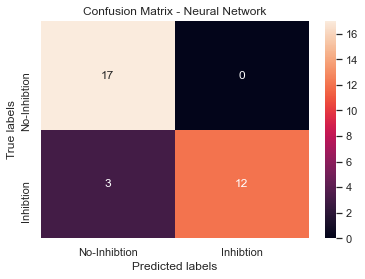

In [302]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state = 58)
y_pred = NN_model.predict(X_test)
y_pred = y_pred > 0.9
y_pred = y_pred.astype(int)

conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_pred)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, annot=True, fmt='g', ax=ax)
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix - Neural Network')
ax.xaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
ax.yaxis.set_ticklabels(["No-Inhibtion", 'Inhibtion'])
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/Confusion_Matrix_Neural Network.svg"
plt.savefig(save_fig_to)
plt.show()


In [260]:
df_modeling_summary

,model,accuracy,accuracy_sem,f1-score_avg,f1-score_sem,f1-score_Inhi,f1-score_NoInhi,recall_avg,recall_sem,recall_Inhi,recall_NoInhi,precision_avg,precision_sem,precision_Inhi,precision_NoInhi
1,SVG,0.88,0.05,0.88,0.04,0.86,0.88,0.88,0.05,0.92,0.88,0.92,0.03,0.86,0.9
2,Logistic_Regression,0.88,0.03,0.87,0.03,0.84,0.87,0.88,0.03,0.86,0.89,0.91,0.02,0.88,0.9
3,Random Forest,0.69,0.06,0.69,0.06,0.65,0.69,0.69,0.06,0.64,0.72,0.72,0.06,0.7,0.7
4,Neural Network,0.94,0.03,0.93,0.03,0.9,0.95,0.94,0.03,0.84,1.0,0.95,0.02,1.0,0.92


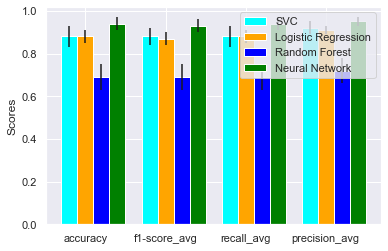

In [303]:
x = np.arange(4)
SVG_results = df_modeling_summary.loc[df_modeling_summary["model"] == "SVG", ["accuracy", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
SVG_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "SVG", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
Logistic_Regression_results = df_modeling_summary.loc[df_modeling_summary["model"] == "Logistic_Regression", ["accuracy", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
Logistic_Regression_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "Logistic_Regression", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
Random_Forest_results = df_modeling_summary.loc[df_modeling_summary["model"] == "Random Forest", ["accuracy", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
Random_Forest_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "Random Forest", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()
NN_results = df_modeling_summary.loc[df_modeling_summary["model"] == "Neural Network", ["accuracy", "f1-score_avg", "recall_avg", "precision_avg"]].values.tolist()
NN_sem = df_modeling_summary.loc[df_modeling_summary["model"] == "Neural Network", ["accuracy_sem", "f1-score_sem", "recall_sem", "precision_sem"]].values.tolist()

width = 0.2
plt.bar(x -0.2, SVG_results[0], width, color='cyan', yerr = SVG_sem[0])
plt.bar(x, Logistic_Regression_results[0], width, color='orange', yerr = Logistic_Regression_sem[0])
plt.bar(x+ 0.2, Random_Forest_results[0], width, color='blue', yerr = Random_Forest_sem[0])
plt.bar(x+ 0.4, NN_results[0], width, color='green', yerr = NN_sem[0])
plt.xticks(x, ['accuracy', 'f1-score_avg', 'recall_avg', 'precision_avg'])
plt.ylabel("Scores")
plt.legend(["SVC", "Logistic Regression", "Random Forest", "Neural Network"])
save_fig_to = "G:/NI_VTA/IN_VIVO/Short_stim/fig_short/Models_score.svg"
plt.savefig(save_fig_to)
plt.show()
